In [216]:
import hvplot.pandas
import pandas as pd
import json
import requests
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

In [217]:
#Building the response
url = "https://data.lacity.org/resource/2nrs-mtv8.json?"
limit = "&$limit=1000000"
# token = "$$app_token=2chCzz50gH6DpOapebwdtsXcQ"
response = requests.get(url,limit).json()

In [218]:
response_df = pd.DataFrame(response)

In [219]:
#Removing latitude and longitudes of 0,0
response_df_formatted = response_df.copy()
response_df_formatted["lat"]=response_df_formatted["lat"].astype(float)
response_df_formatted["lon"]=response_df_formatted["lon"].astype(float)
response_df_formatted=response_df_formatted.loc[(response_df_formatted["lon"] != 0) & (response_df_formatted["lat"] != 0)]

In [220]:
#Creating Year column
#Putting Date into Datetime
response_df_formatted['date_occ'] = pd.to_datetime(response_df_formatted['date_occ'])
response_df_formatted['Year'] = pd.to_datetime(response_df_formatted['date_occ']).dt.strftime('%Y')
response_df_formatted.head()

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,...,location,lat,lon,mocodes,weapon_used_cd,weapon_desc,cross_street,crm_cd_3,crm_cd_4,Year
0,190326475,2020-03-01T00:00:00.000,2020-03-01,2130,07,Wilshire,0784,1,510,VEHICLE - STOLEN,...,1900 S LONGWOOD AV,34.0375,-118.3506,NaN,NaN,NaN,NaN,NaN,NaN,2020
1,200106753,2020-02-09T00:00:00.000,2020-02-08,1800,01,Central,0182,1,330,BURGLARY FROM VEHICLE,...,1000 S FLOWER ST,34.0444,-118.2628,1822 1402 0344,NaN,NaN,NaN,NaN,NaN,2020
2,200320258,2020-11-11T00:00:00.000,2020-11-04,1700,03,Southwest,0356,1,480,BIKE - STOLEN,...,1400 W 37TH ST,34.0210,-118.3002,0344 1251,NaN,NaN,NaN,NaN,NaN,2020
3,200907217,2023-05-10T00:00:00.000,2020-03-10,2037,09,Van Nuys,0964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,14000 RIVERSIDE DR,34.1576,-118.4387,0325 1501,NaN,NaN,NaN,NaN,NaN,2020
4,220614831,2022-08-18T00:00:00.000,2020-08-17,1200,06,Hollywood,0666,2,354,THEFT OF IDENTITY,...,1900 TRANSIENT,34.0944,-118.3277,1822 1501 0930 2004,NaN,NaN,NaN,NaN,NaN,2020


In [221]:
#Dropping NAs for these columns
clean = response_df_formatted.dropna(subset=["date_occ", "area_name", "lat", "lon"])
clean.head()

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,...,location,lat,lon,mocodes,weapon_used_cd,weapon_desc,cross_street,crm_cd_3,crm_cd_4,Year
0,190326475,2020-03-01T00:00:00.000,2020-03-01,2130,07,Wilshire,0784,1,510,VEHICLE - STOLEN,...,1900 S LONGWOOD AV,34.0375,-118.3506,NaN,NaN,NaN,NaN,NaN,NaN,2020
1,200106753,2020-02-09T00:00:00.000,2020-02-08,1800,01,Central,0182,1,330,BURGLARY FROM VEHICLE,...,1000 S FLOWER ST,34.0444,-118.2628,1822 1402 0344,NaN,NaN,NaN,NaN,NaN,2020
2,200320258,2020-11-11T00:00:00.000,2020-11-04,1700,03,Southwest,0356,1,480,BIKE - STOLEN,...,1400 W 37TH ST,34.0210,-118.3002,0344 1251,NaN,NaN,NaN,NaN,NaN,2020
3,200907217,2023-05-10T00:00:00.000,2020-03-10,2037,09,Van Nuys,0964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,14000 RIVERSIDE DR,34.1576,-118.4387,0325 1501,NaN,NaN,NaN,NaN,NaN,2020
4,220614831,2022-08-18T00:00:00.000,2020-08-17,1200,06,Hollywood,0666,2,354,THEFT OF IDENTITY,...,1900 TRANSIENT,34.0944,-118.3277,1822 1501 0930 2004,NaN,NaN,NaN,NaN,NaN,2020


In [222]:
#Putting years into March to March year
#Labelling as B as other team members used the same labels, do not want to overwrite one another's work
clean_2021B = clean.loc[(clean["date_occ"] >= "2020-03-01") & (clean["date_occ"] < "2021-03-01")]
clean_2122B = clean.loc[(clean["date_occ"] >= "2021-03-01") & (clean["date_occ"] < "2022-03-01")]
clean_2223B = clean.loc[(clean["date_occ"] >= "2022-03-01") & (clean["date_occ"] < "2023-03-01")]
clean_2324B = clean.loc[(clean["date_occ"] >= "2023-03-01") & (clean["date_occ"] < "2024-03-01")]
clean_2021B["Year"] = "2020"
clean_2122B["Year"] = "2021"
clean_2223B["Year"] = "2022"
clean_2324B["Year"] = "2023"

C:\Users\PC\AppData\Local\Temp\ipykernel_17164\2139940424.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_2021B["Year"] = "2020"
C:\Users\PC\AppData\Local\Temp\ipykernel_17164\2139940424.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_2122B["Year"] = "2021"
C:\Users\PC\AppData\Local\Temp\ipykernel_17164\2139940424.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [223]:
#Combining the cleaned columns into ComboDatab
combodatab = pd.concat([clean_2021B, clean_2122B, clean_2223B, clean_2324B], ignore_index=False, axis=0)

In [224]:
#Putting years into March to March year
#Labelling as B as other team members used the same labels, do not want to overwrite one another's work

clean_2021_LR = response_df_formatted.loc[(response_df_formatted["date_occ"] >= "2020-03-01") & (response_df_formatted["date_occ"] < "2021-03-01")]
clean_2122_LR = response_df_formatted.loc[(response_df_formatted["date_occ"] >= "2021-03-01") & (response_df_formatted["date_occ"] < "2022-03-01")]
clean_2223_LR = response_df_formatted.loc[(response_df_formatted["date_occ"] >= "2022-03-01") & (response_df_formatted["date_occ"] < "2023-03-01")]
clean_2324_LR = response_df_formatted.loc[(response_df_formatted["date_occ"] >= "2023-03-01") & (response_df_formatted["date_occ"] < "2024-03-01")]
clean_2021_LR["Year"] = "Q1"
clean_2122_LR["Year"] = "Q2"
clean_2223_LR["Year"] = "Q3"
clean_2324_LR["Year"] = "Q4"
clean_2021_LR.reset_index(drop=True)
clean_2122_LR.reset_index(drop=True)
clean_2223_LR.reset_index(drop=True)
clean_2324_LR.reset_index(drop=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_17164\890519490.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_2021_LR["Year"] = "Q1"
C:\Users\PC\AppData\Local\Temp\ipykernel_17164\890519490.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_2122_LR["Year"] = "Q2"
C:\Users\PC\AppData\Local\Temp\ipykernel_17164\890519490.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,...,location,lat,lon,mocodes,weapon_used_cd,weapon_desc,cross_street,crm_cd_3,crm_cd_4,Year
0,240504190,2024-01-05T00:00:00.000,2024-01-05,1548,05,Harbor,0566,1,310,BURGLARY,...,300 W 11TH ST,33.7342,-118.2836,0314 0329 1601,NaN,NaN,NaN,NaN,NaN,Q4
1,230611294,2023-06-17T00:00:00.000,2023-06-17,1140,06,Hollywood,0668,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),...,5500 W SUNSET BL,34.0981,-118.3092,1822 0325 2004,NaN,NaN,NaN,NaN,NaN,Q4
2,231515059,2023-09-19T00:00:00.000,2023-09-19,1030,15,N Hollywood,1549,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,BURBANK BL,34.1721,-118.3616,1309 0421 0913 0334,102,HAND GUN,CAHUENGA BL,NaN,NaN,Q4
3,230110347,2023-04-11T00:00:00.000,2023-04-10,0816,01,Central,0192,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,1300 S FLOWER ST,34.0401,-118.2669,0344 1822,NaN,NaN,NaN,NaN,NaN,Q4
4,230617683,2023-11-10T00:00:00.000,2023-11-08,0800,06,Hollywood,0663,2,662,"BUNCO, GRAND THEFT",...,1200 SEWARD ST,34.0907,-118.3384,1501 1900 0701 1822,NaN,NaN,NaN,NaN,NaN,Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228804,241605270,2024-02-11T00:00:00.000,2024-02-11,1920,16,Foothill,1681,2,888,TRESPASSING,...,8700 SHARP AV,34.2278,-118.4051,0913 1202 1501,NaN,NaN,NaN,NaN,NaN,Q4
228805,241604405,2024-01-14T00:00:00.000,2024-01-13,0720,16,Foothill,1673,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,8700 LANKERSHIM BL,34.2271,-118.3878,0400 1822 1310 0416,207,OTHER KNIFE,NaN,NaN,NaN,Q4
228806,242106032,2024-02-20T00:00:00.000,2024-02-17,2330,21,Topanga,2103,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,22700 NAPA ST,34.2260,-118.6214,0385,NaN,NaN,NaN,NaN,NaN,Q4
228807,242004546,2024-01-16T00:00:00.000,2024-01-16,1510,20,Olympic,2013,2,624,BATTERY - SIMPLE ASSAULT,...,HOBART BL,34.0690,-118.3054,2047 0400 0429 0444 1202 1822,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",3RD ST,NaN,NaN,Q4


In [225]:
#Combining cleaned data into ComboData_LR
combodata_LR = pd.concat([clean_2021_LR, clean_2122_LR, clean_2223_LR, clean_2324_LR], ignore_index=False, axis=0)
combodata_LR.head()

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,...,location,lat,lon,mocodes,weapon_used_cd,weapon_desc,cross_street,crm_cd_3,crm_cd_4,Year
0,190326475,2020-03-01T00:00:00.000,2020-03-01,2130,07,Wilshire,0784,1,510,VEHICLE - STOLEN,...,1900 S LONGWOOD AV,34.0375,-118.3506,NaN,NaN,NaN,NaN,NaN,NaN,Q1
2,200320258,2020-11-11T00:00:00.000,2020-11-04,1700,03,Southwest,0356,1,480,BIKE - STOLEN,...,1400 W 37TH ST,34.0210,-118.3002,0344 1251,NaN,NaN,NaN,NaN,NaN,Q1
3,200907217,2023-05-10T00:00:00.000,2020-03-10,2037,09,Van Nuys,0964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,14000 RIVERSIDE DR,34.1576,-118.4387,0325 1501,NaN,NaN,NaN,NaN,NaN,Q1
4,220614831,2022-08-18T00:00:00.000,2020-08-17,1200,06,Hollywood,0666,2,354,THEFT OF IDENTITY,...,1900 TRANSIENT,34.0944,-118.3277,1822 1501 0930 2004,NaN,NaN,NaN,NaN,NaN,Q1
5,231808869,2023-04-04T00:00:00.000,2020-12-01,2300,18,Southeast,1826,2,354,THEFT OF IDENTITY,...,9900 COMPTON AV,33.9467,-118.2463,1822 0100 0930 0929,NaN,NaN,NaN,NaN,NaN,Q1


In [226]:
#Overwriting response_df_formatted with combodata
response_df_formatted = combodatab

In [227]:
#Adding quarter and calendar year
response_df_formatted["quarter"] = response_df_formatted["date_occ"].dt.quarter
response_df_formatted['Cal_Year'] = response_df_formatted["date_occ"].dt.year

In [228]:
#Replacing Ethnicity codes with the Ethnicity name from the Docs
response_df_formatted["Ethnicity"] = response_df_formatted["vict_descent"].replace({"A":"Other Asian","B": "Black","C":"Chinese","D":"Cambodian",
                                                                                    "F":"Filipino","G":"Guamanian","H":"Hispanic/Latin/Mexican",
                                                                                    "I": "American Indian/Alaskan Native","J":"Japanese",
                                                                                    "K":"Korean","L":"Laotian","O":"Other","P":"Pacific Islander",
                                                                                    "S":"Samoan","U":"Hawaiian","V":"Viatnamese","W":"White","X":"Unknown",
                                                                                    "Z":"Asian Indian"})

In [229]:
#Dropping null "-" from Ethnicity column
validated_vict_desc_data = response_df_formatted[["Ethnicity","Year"]].loc[response_df_formatted["Ethnicity"]!="-"]
ethnicity_victim_count = validated_vict_desc_data["Ethnicity"].count()

In [230]:
#Removing Nulls from Ethnicity column
validated_vict_desc_data.dropna(subset=["Ethnicity"],inplace=True)

In [231]:
#Filtering ethnicity into a new df by year
ethnicity_year_2020 = validated_vict_desc_data.loc[validated_vict_desc_data["Year"] == "2020"]
ethnicity_year_2021 = validated_vict_desc_data.loc[validated_vict_desc_data["Year"] == "2021"]
ethnicity_year_2022 = validated_vict_desc_data.loc[validated_vict_desc_data["Year"] == "2022"]
ethnicity_year_2023 = validated_vict_desc_data.loc[validated_vict_desc_data["Year"] == "2023"]
ethnicity_year_2024 = validated_vict_desc_data.loc[validated_vict_desc_data["Year"] == "2024"]

In [232]:
#Calculating ethnicities as a % of total crime
ethnicity_breakdown_2020=ethnicity_year_2020.groupby(["Ethnicity"]).size()/ethnicity_year_2020["Ethnicity"].count()
ethnicity_breakdown_2021=ethnicity_year_2021.groupby(["Ethnicity"]).size()/ethnicity_year_2021["Ethnicity"].count()
ethnicity_breakdown_2022=ethnicity_year_2022.groupby(["Ethnicity"]).size()/ethnicity_year_2022["Ethnicity"].count()
ethnicity_breakdown_2023=ethnicity_year_2023.groupby(["Ethnicity"]).size()/ethnicity_year_2023["Ethnicity"].count()
ethnicity_breakdown_2024=ethnicity_year_2024.groupby(["Ethnicity"]).size()/ethnicity_year_2024["Ethnicity"].count()

In [233]:
#Calculating the change in each ethnicities crime increase/decrease YoY
ethnicity_breakdown_change_2021 = (100*(ethnicity_breakdown_2021 - ethnicity_breakdown_2020)/ethnicity_breakdown_2020).rename("2021 % Change")
ethnicity_breakdown_change_2022 = (100*(ethnicity_breakdown_2022 - ethnicity_breakdown_2021)/ethnicity_breakdown_2021).rename("2022 % Change")
ethnicity_breakdown_change_2023 = (100*(ethnicity_breakdown_2023 - ethnicity_breakdown_2022)/ethnicity_breakdown_2022).rename("2023 % Change")


In [234]:
#Formatting
ethnicity_bd_df_21 = ethnicity_breakdown_change_2021.to_frame()

ethnicity_bd_df_22 = ethnicity_breakdown_change_2022.to_frame()

ethnicity_bd_df_23 = ethnicity_breakdown_change_2023.to_frame()


In [235]:
#Formatting
ethnicity_bd_df_21.reset_index(inplace = True)
ethnicity_bd_df_22.reset_index(inplace = True)
ethnicity_bd_df_23.reset_index(inplace = True)

In [236]:
#Combining the ethnicity % changes, sorting by change in 2021 to highlight spikes
combined_bd_df = ethnicity_bd_df_21.merge(ethnicity_bd_df_22,how="outer",on="Ethnicity")
combined_bd_df = combined_bd_df.merge(ethnicity_bd_df_23,how="outer",on="Ethnicity")
combined_bd_df.sort_values(by=['2021 % Change'],ascending=False,inplace=True)
combined_bd_df_head = combined_bd_df.head(7)

In [237]:
#Shortening this label for graph readability
combined_bd_df_head["Ethnicity"].replace({"American Indian/Alaskan Native":"Indian/Native"},inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_17164\3867987994.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_bd_df_head["Ethnicity"].replace({"American Indian/Alaskan Native":"Indian/Native"},inplace=True)


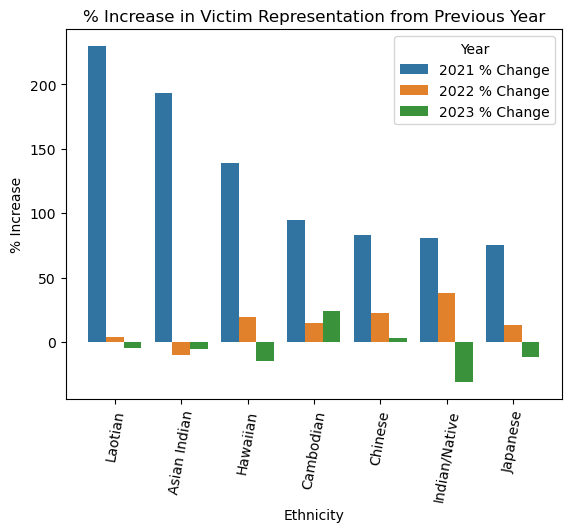

In [238]:
#Building the plot
percent_change_plot = sns.barplot(data=combined_bd_df_head.melt(id_vars="Ethnicity",value_name="% Increase",var_name="Year"),x="Ethnicity",y="% Increase",hue="Year")
percent_change_plot.set_title("% Increase in Victim Representation from Previous Year")
plt.xticks(rotation=80)
percent_change_plot.plot()
plt.savefig('Graphs/% Increase in Victim Representation from Previous Year')

Insight: Primarily Asian groups saw noticeable spikes as victims, with many of these trends increasing YoY or remainng stable

In [239]:
#Sorting by highest change in 2021
ethnicity_bd_df_21.sort_values(by=['2021 % Change'],ascending=False,inplace=True)

In [240]:
#Shortening this df to only top 15 for readability
ethnicity_bd_df_21 = ethnicity_bd_df_21.head(15)

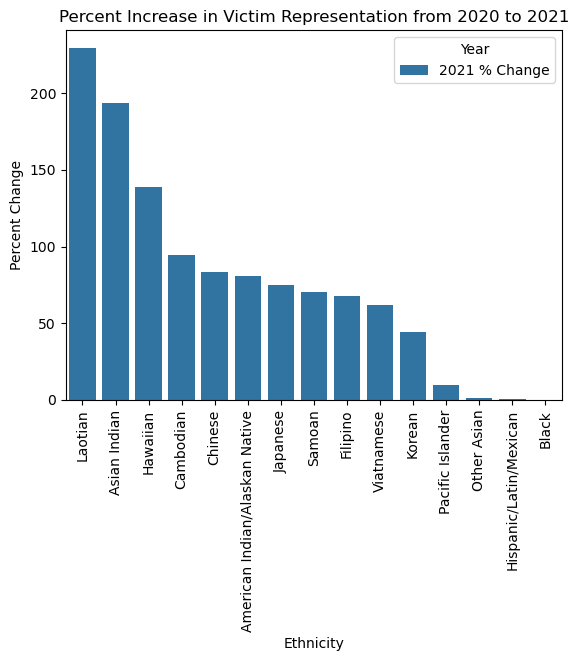

In [241]:
#Only 2021 changes
percent_change_plot = sns.barplot(data=ethnicity_bd_df_21.melt(id_vars="Ethnicity",value_name="Percent Change",var_name="Year"),
x="Ethnicity",y="Percent Change",hue="Year")
plt.xticks(rotation=90)
plt.title('Percent Increase in Victim Representation from 2020 to 2021')
plt.savefig('Graphs/% Increase in Victim Representation from 2020 to 2021')

In [242]:
#codes sourced from LAPD PDF on dataset site
mocode_formatted = response_df_formatted.copy().dropna(subset=['mocodes'])


In [243]:
mocode_formatted['mocodes']

2                             0344 1251
3                             0325 1501
4                   1822 1501 0930 2004
5                   1822 0100 0930 0929
6                             0930 0929
                      ...              
932135                   0913 1202 1501
932136              0400 1822 1310 0416
932137                             0385
932138    2047 0400 0429 0444 1202 1822
932139                   0329 0400 0416
Name: mocodes, Length: 750236, dtype: object

Note: Mocodes, in addition to being undefined, are grouped in a single value in the column. With more time, we would run a text.split() into four columns, replace each code with the actual MO per the docs, and graph them alongside interesting metrics (by victim, crime type). However with time constraints we will leave this for next steps.

In [244]:
#Starting the age analysis - converting ages to numbers
response_df_formatted["vict_age"]=response_df_formatted["vict_age"].astype("int")

In [245]:
#Binning the ages into age groups for better readability
bins = [0,18,30,45,65,120]
group_names = ["Minor","Young Adult","Adult","Senior","Elderly"]
response_df_formatted["Age Group"] = pd.cut(response_df_formatted["vict_age"],bins,labels=group_names,include_lowest=True)

In [246]:
#Checking to see if data is clean
response_df_formatted["vict_age"].value_counts()

vict_age
 0      221474
 30      19774
 35      19456
 31      18934
 29      18782
         ...  
 98         68
 97         67
-2          24
-3           2
 120         1
Name: count, Length: 103, dtype: int64

In [247]:
#Removing ages of 0 and negative ages
validated_age_desc_data = response_df_formatted.loc[response_df_formatted["vict_age"]>=1]
validated_age_desc_data["vict_age"].value_counts()

vict_age
30     19774
35     19456
31     18934
29     18782
28     18582
       ...  
95        89
96        85
98        68
97        67
120        1
Name: count, Length: 99, dtype: int64

In [248]:
#Analysis on age group - crime allocation
validated_age_desc_data["Age Group"].value_counts()

Age Group
Adult          227944
Young Adult    186158
Senior         165147
Elderly         44370
Minor           28141
Name: count, dtype: int64

In [249]:
#Breaking up the crime into years
age_group_2020 = validated_age_desc_data["Age Group"].loc[response_df_formatted["Year"] == "2020"]
age_group_2021 = validated_age_desc_data["Age Group"].loc[response_df_formatted["Year"] == "2021"]
age_group_2022 = validated_age_desc_data["Age Group"].loc[response_df_formatted["Year"] == "2022"]
age_group_2023 = validated_age_desc_data["Age Group"].loc[response_df_formatted["Year"] == "2023"]
age_group_all = validated_age_desc_data["Age Group"].count()

In [250]:
#Age group % of crime against the total crime in that year
age_breakdown_2020=(age_group_2020.value_counts()*100/age_group_2020.count()).rename("2020 Age Group %")
age_breakdown_2021=(age_group_2021.value_counts()*100/age_group_2021.count()).rename("2021 Age Group %")
age_breakdown_2022=(age_group_2022.value_counts()*100/age_group_2022.count()).rename("2022 Age Group %")
age_breakdown_2023=(age_group_2023.value_counts()*100/age_group_2023.count()).rename("2023 Age Group %")


In [251]:
#Formatting!
age_breakdown_2020_df = age_breakdown_2020.to_frame()
age_breakdown_2020_df.reset_index(inplace = True)

age_breakdown_2021_df = age_breakdown_2021.to_frame()
age_breakdown_2021_df.reset_index(inplace = True)

age_breakdown_2022_df = age_breakdown_2022.to_frame()
age_breakdown_2022_df.reset_index(inplace = True)

age_breakdown_2023_df = age_breakdown_2023.to_frame()
age_breakdown_2023_df.reset_index(inplace = True)


In [252]:
#Combining the new dfs
combined_age_df = age_breakdown_2020_df.merge(age_breakdown_2021_df,how="outer",on="Age Group")
combined_age_df = combined_age_df.merge(age_breakdown_2022_df,how="outer", on="Age Group")
combined_age_df = combined_age_df.merge(age_breakdown_2023_df,how="outer", on="Age Group")


In [253]:
#Renaming columns from year identifiers to categorical identifiers to tie analysis to question prompt 
# & COVID response
combined_age_categorical_df = combined_age_df.rename(columns = {"2020 Age Group %":"Restrictions Begin",
                                                                "2021 Age Group %":"Vaccine Availability",
                                                                "2022 Age Group %":"Booster Availability",
                                                                "2023 Age Group %":"Restrictions End"})


In [254]:
#Only yearly crime data - can see it increases YoY with the exception of a slight decrease in 2023
response_df_year_only = response_df_formatted["Year"]
response_df_year_only.value_counts()

Year
2022    237014
2023    228809
2021    212653
2020    194866
Name: count, dtype: int64

c:\Users\PC\anaconda3\envs\inclassfeb2024\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\PC\anaconda3\envs\inclassfeb2024\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


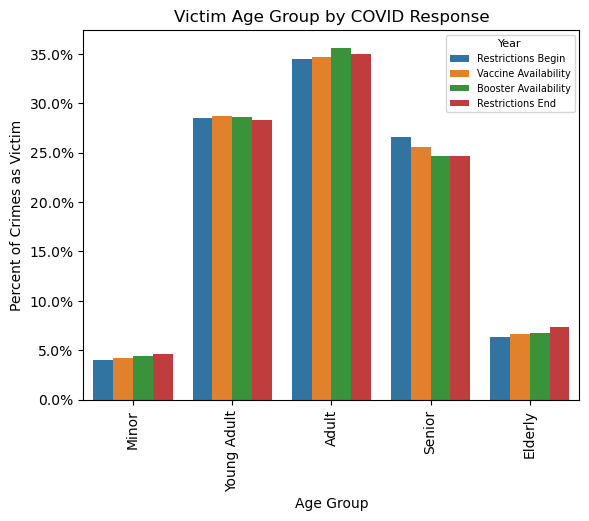

In [255]:
#Plotting the age group % of victims, over time
age_group_plot = sns.barplot(data=combined_age_categorical_df.melt(id_vars="Age Group",value_name="Percent of Crimes as Victim",var_name="COVID Response"),
x="Age Group",y="Percent of Crimes as Victim",hue="COVID Response")
plt.xticks(rotation=90)
plt.legend(title="Year", fontsize=7, title_fontsize=8)
age_group_plot.set_title("Victim Age Group by COVID Response")
age_group_plot.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.savefig('Graphs/Victim Age Group by COVID Response.png')

In [256]:
#Let's take a look at what kinds of crime is driving each age group
crime_by_vic_age = validated_age_desc_data[["Age Group","crm_cd_desc","Year"]]

In [257]:
#Filtering dfs by age group
crime_by_vic_minor = crime_by_vic_age.loc[crime_by_vic_age["Age Group"] == "Minor"]
crime_by_vic_young_adult = crime_by_vic_age.loc[crime_by_vic_age["Age Group"] == "Young Adult"]
crime_by_vic_adult = crime_by_vic_age.loc[crime_by_vic_age["Age Group"] == "Adult"]
crime_by_vic_senior = crime_by_vic_age.loc[crime_by_vic_age["Age Group"] == "Senior"]
crime_by_vic_elderly = crime_by_vic_age.loc[crime_by_vic_age["Age Group"] == "Elderly"]

In [258]:
#creating a new dataframe for the chart. As is multiple types of assault are showing up in the graph - relevant as they are different types of assault
#but uninteresting presentation. Also removing "Crime Against Child" as it is vague when defining crime type against children
#Shortening Unlawful Sex for readability
crime_by_vic_minor_chart_view = crime_by_vic_minor.copy()
print(len(crime_by_vic_minor_chart_view["crm_cd_desc"].unique()))
crime_by_vic_minor_chart_view["crm_cd_desc"].replace({"CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT":"ASSAULT",
"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT":"ASSAULT","BATTERY - SIMPLE ASSAULT":"ASSAULT",
"INTIMATE PARTNER - SIMPLE ASSAULT":"ASSAULT","SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ": "UNLAWFUL SEX"},inplace=True)
crime_by_vic_minor_chart_view = crime_by_vic_minor_chart_view.loc[
    crime_by_vic_minor_chart_view["crm_cd_desc"]!= "CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)"]
print(len(crime_by_vic_minor_chart_view["crm_cd_desc"].unique()))
crime_by_vic_minor_chart_view["crm_cd_desc"].unique()

103
99


array(['SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH',
       'THEFT OF IDENTITY', 'THEFT PLAIN - PETTY ($950 & UNDER)',
       'BURGLARY FROM VEHICLE', 'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD',
       'ORAL COPULATION', 'UNLAWFUL SEX', 'RAPE, FORCIBLE', 'ASSAULT',
       'CHILD ANNOYING (17YRS & UNDER)', 'BATTERY WITH SEXUAL CONTACT',
       'SEXUAL PENETRATION W/FOREIGN OBJECT', 'DISTURBING THE PEACE',
       'OTHER MISCELLANEOUS CRIME',
       'INTIMATE PARTNER - AGGRAVATED ASSAULT', 'CONTRIBUTING',
       'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT',
       'UNAUTHORIZED COMPUTER ACCESS', 'LEWD/LASCIVIOUS ACTS WITH CHILD',
       'CHILD NEGLECT (SEE 300 W.I.C.)', 'RAPE, ATTEMPTED', 'PEEPING TOM',
       'ROBBERY', 'HUMAN TRAFFICKING - COMMERCIAL SEX ACTS',
       'THEFT FROM PERSON - ATTEMPT',
       'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
       'ATTEMPTED ROBBERY', 'INDECENT EXPOSURE',
       'KIDNAPPING - GRAND ATTEMPT', 'CONTEMPT OF COURT',
     

In [259]:
#I would like to see the top crimes against minors
minor_as_vic_crime_type = crime_by_vic_minor_chart_view["crm_cd_desc"].value_counts()
minor_as_vic_crime_type.rename("Crimes Against Minors")
minor_as_vic_crime_type.sort_values(ascending=False)
top_crimes_minor_as_vic = minor_as_vic_crime_type.head(5)


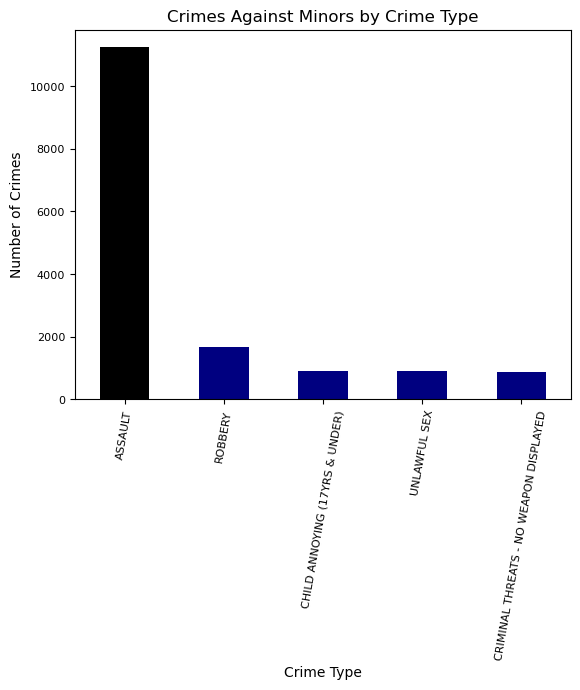

In [260]:
#Plotting and formatting - let's try keeping the colors in police-theme
colors = ["black","navy","navy","navy","navy"]
top_crimes_minor_as_vic.plot(kind='bar', color = colors, title = "Crimes Against Minors by Crime Type", ylabel = "Number of Crimes", xlabel = "Crime Type",rot=80,fontsize = 8)
plt.savefig('Graphs/Crimes Against Minors by Crime Type (Bar).png')

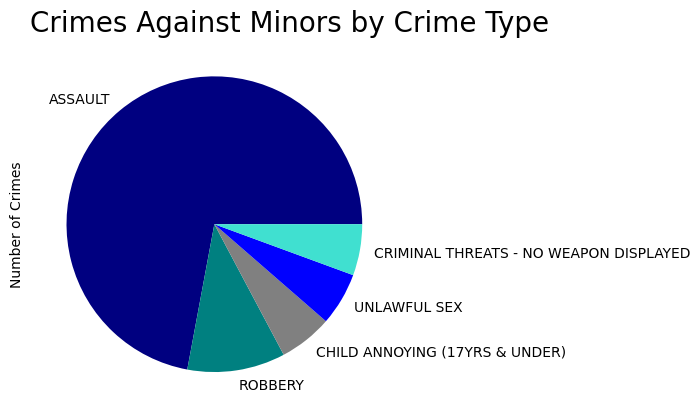

In [261]:
#Plotting and formatting - let's try keeping the colors in police-theme
colors = ["navy","teal","grey","blue","turquoise"]
plot_minor_crime_type = top_crimes_minor_as_vic.plot(kind='pie', ylabel = "Number of Crimes", colors = colors)
plt.title("Crimes Against Minors by Crime Type",fontsize = 20, loc = 'left')
plt.savefig('Graphs/Crimes Against Minors by Crime Type (Pie).png')

In [262]:
#Looking at crimes targeting Seniors
senior_as_vic_crime_type = crime_by_vic_senior["crm_cd_desc"].value_counts()
senior_as_vic_crime_type.rename("Crimes Against Seniors")
senior_as_vic_crime_type.sort_values(ascending=False)
top_crimes_senior_as_vic = senior_as_vic_crime_type.head(5)


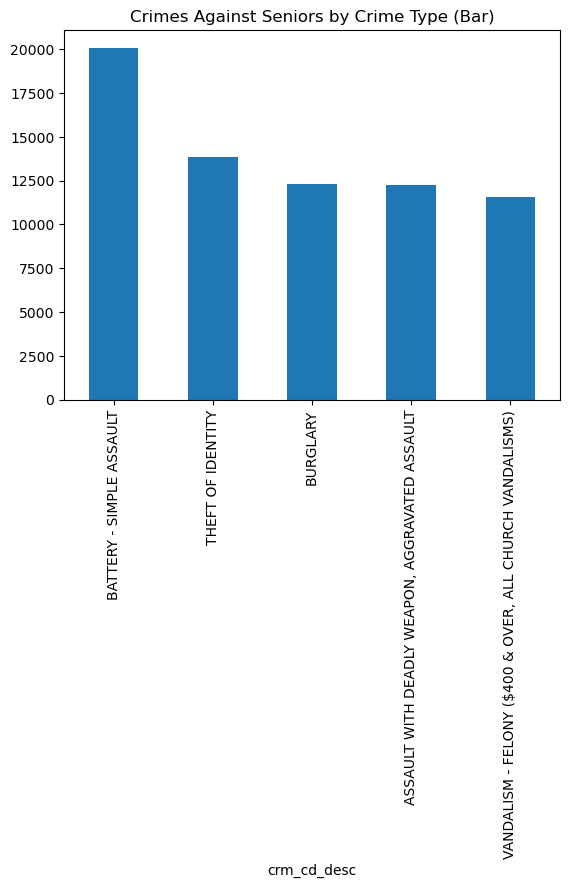

In [263]:
#Plotting crimes against seniors by crime type
top_crimes_senior_as_vic.plot(kind='bar', stacked=True)
plt.title('Crimes Against Seniors by Crime Type (Bar)')
plt.savefig('Graphs/Crimes Against Seniors by Crime Type (Bar).png')

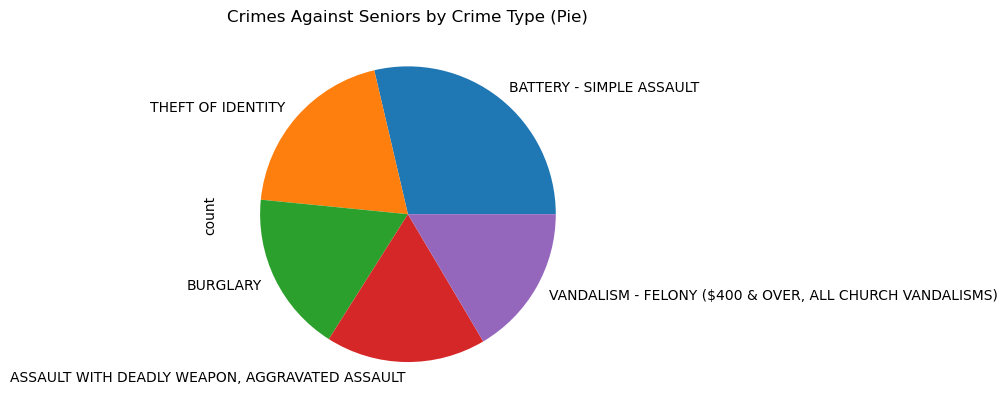

In [264]:
#Plotting crimes against seniors by crime type
top_crimes_senior_as_vic.plot(kind='pie')
plt.title('Crimes Against Seniors by Crime Type (Pie)')
plt.savefig('Graphs/Crimes Against Seniors by Crime Type (Pie).png')

In [265]:
#Let's see what crimes are targetting the elderly
elderly_as_vic_crime_type = crime_by_vic_elderly["crm_cd_desc"].value_counts()
elderly_as_vic_crime_type.rename("Crimes Against Elderly")
elderly_as_vic_crime_type.sort_values(ascending=False)
top_crimes_elderly_as_vic = elderly_as_vic_crime_type.head(5)

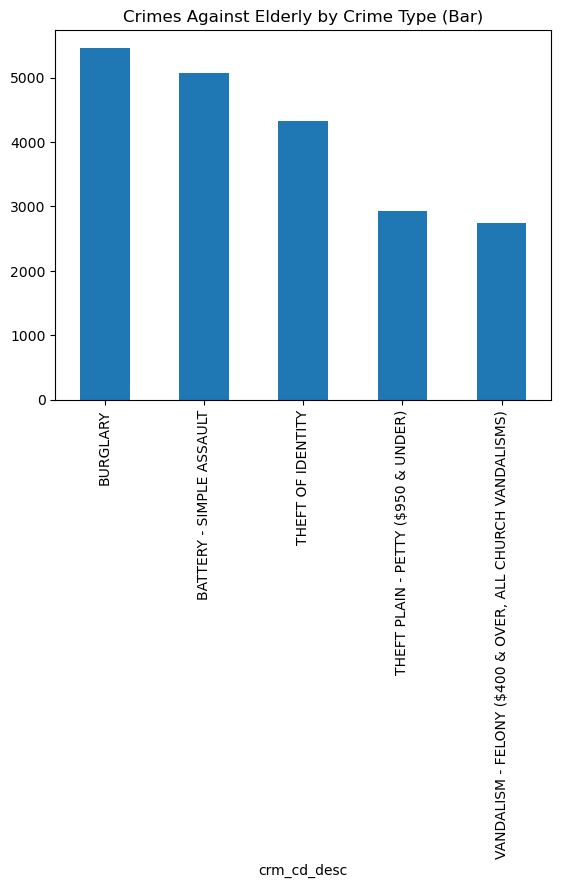

In [266]:
#Plotting crimes against elderly by crime type
top_crimes_elderly_as_vic.plot(kind='bar')
plt.title('Crimes Against Elderly by Crime Type (Bar)')
plt.savefig('Graphs/Crimes Against Elderly by Crime Type (Bar).png')

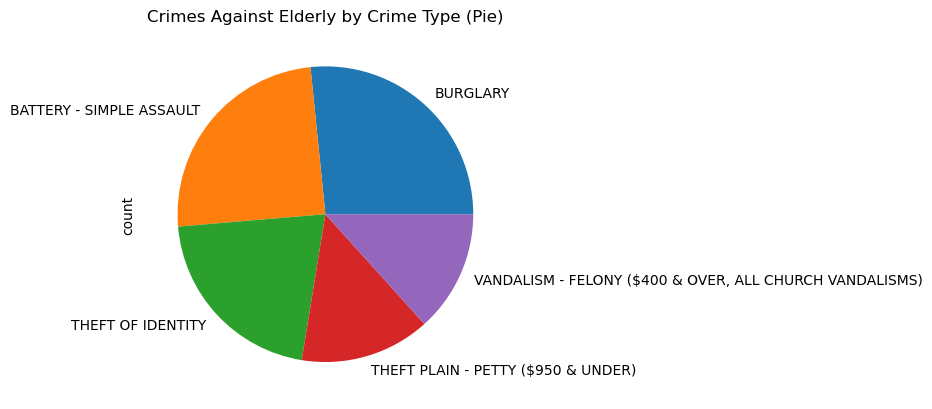

In [267]:
#Plotting crimes against seniors by crime type - pie chart!
top_crimes_elderly_as_vic.plot(kind='pie')
plt.title('Crimes Against Elderly by Crime Type (Pie)')
plt.savefig('Graphs/Crimes Against Elderly by Crime Type (Pie).png')

In [268]:
#Let's look at household and domestic crimes against minors - did they change with lockdowns?
#Would assume a decreasing trend over time - as restrictions are lifted less time at home
domestic_crimes = validated_age_desc_data[["Age Group","Year","premis_desc"]].loc[(validated_age_desc_data["premis_desc"] == 'CONDOMINIUM/TOWNHOUSE') | 
(validated_age_desc_data["premis_desc"] == 'GROUP HOME')| 
(validated_age_desc_data["premis_desc"] == "MOBILE HOME/TRAILERS/CONSTRUCTION TRAILERS/RV'S/MOTORHOME")
|(validated_age_desc_data["premis_desc"] == 'FOSTER HOME BOYS OR GIRLS*') | 
(validated_age_desc_data["premis_desc"] == 'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)')
|(validated_age_desc_data["premis_desc"] == 'SINGLE FAMILY DWELLING')]
domestic_minor_crimes = domestic_crimes.loc[domestic_crimes["Age Group"] == "Minor"]
domestic_minor_crimes.head()
domestic_minor_crimes.rename(columns = {"premis_desc":"Location Description"},inplace=True)


C:\Users\PC\AppData\Local\Temp\ipykernel_17164\2391352025.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  domestic_minor_crimes.rename(columns = {"premis_desc":"Location Description"},inplace=True)


In [269]:
#Building df
dmc_yearly = domestic_minor_crimes["Year"].value_counts()

In [270]:
#Formatting df
dmc_yearly.sort_index(inplace=True)

In [271]:
#Replacing column name to tie to COVID Response
dmc_yearly = dmc_yearly.rename({"2020":"Restrictions Begin (2020)",
                                                                "2021":"Vaccine Availability (2021)",
                                                                "2022":"Booster Availability (2022)",
                                                                "2023":"Restrictions End (2023)"})

dmc_yearly


Year
Restrictions Begin (2020)      3207
Vaccine Availability (2021)    2944
Booster Availability (2022)    3255
Restrictions End (2023)        2881
Name: count, dtype: int64

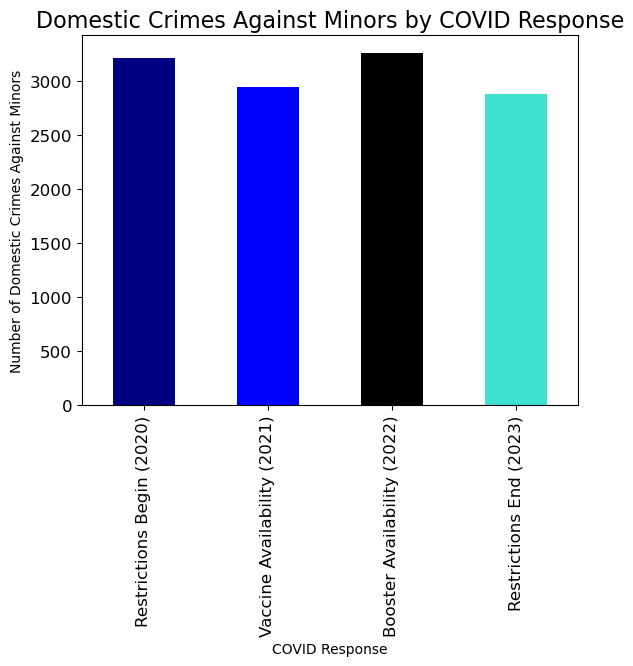

In [272]:
#Building the graph
colors = ["navy","blue","black","turquoise"]
dmc_yearly_plot = dmc_yearly.plot(kind="bar",color = colors, xlabel = "COVID Response" , ylabel = "Number of Domestic Crimes Against Minors", fontsize = 12)
dmc_yearly_plot
plt.title("Domestic Crimes Against Minors by COVID Response", fontsize = 16)
plt.savefig('Graphs/Domestic Crimes Against Minors by COVID Response.png')

In [273]:
#Let's zero in on crimes specifically against children under 13
child_crime = validated_age_desc_data.loc[(validated_age_desc_data["crm_cd_desc"] == 'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT') | 
(validated_age_desc_data["crm_cd_desc"] == 'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT') | (validated_age_desc_data["crm_cd_desc"] == 
'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT')
| (validated_age_desc_data["crm_cd_desc"] == 'LEWD/LASCIVIOUS ACTS WITH CHILD') | (validated_age_desc_data["crm_cd_desc"] == 'CHILD NEGLECT (SEE 300 W.I.C.)')]

child_crime = child_crime["Year"].value_counts()

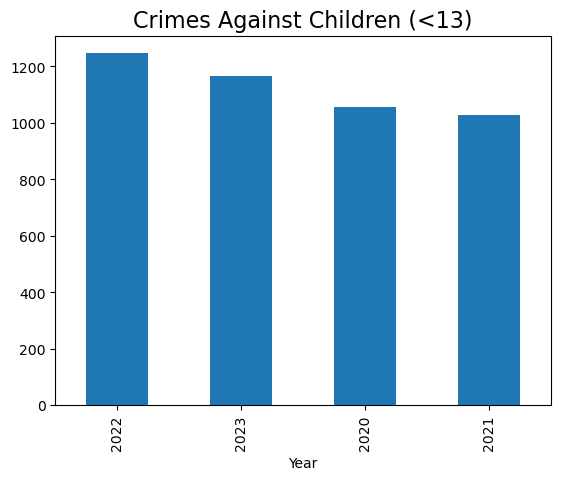

In [274]:
#Plotting crimes against children under 13 by crime type
child_crime.plot(kind="bar")
plt.title("Crimes Against Children (<13)", fontsize = 16)
plt.savefig('Graphs/Crimes Against Children Top Years.png')

## Vaibhav's Code

In [275]:
y_value = response_df_formatted.groupby(["Year"]).count()

In [276]:
y_value.reset_index(inplace=True)

<Axes: xlabel='Year'>

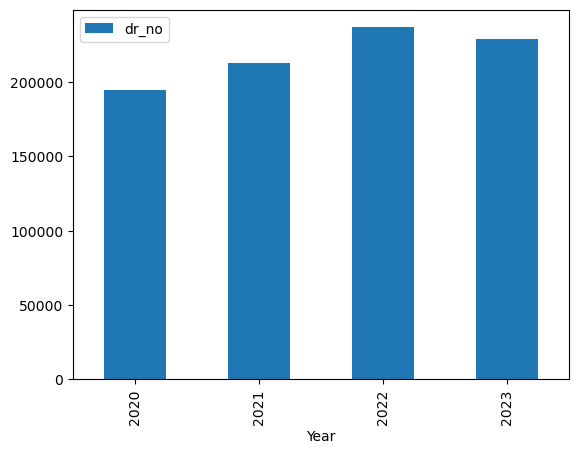

In [277]:
y_value.plot(kind="bar",x="Year",y="dr_no")

In [278]:
crime_code_df=response_df_formatted[["crm_cd_desc","crm_cd","crm_cd_1","crm_cd_2","crm_cd_3","crm_cd_4","Year","area_name"]]
crime_code_df.describe()

,crm_cd_desc,crm_cd,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,Year,area_name
count,873342,873342,873331,63417,2142,61,873342,873342
unique,139,139,141,124,35,6,4,21
top,VEHICLE - STOLEN,510,510,998,998,998,2022,Central
freq,94862,94862,94844,50746,1892,53,237014,59548


In [279]:
crime_code_df_area=crime_code_df.groupby(["area_name"]).count()
crime_code_df_year=crime_code_df.groupby(["Year"]).count()
crime_code_df_desc=crime_code_df.groupby(["crm_cd_desc"]).size()
crime_code_df_desc_1=crime_code_df.groupby(["crm_cd_desc"]).count()
crime_code_df_cd=crime_code_df.groupby(["crm_cd","crm_cd_desc"]).count()

In [280]:
response_df_formatted["crm_cd_desc"].value_counts()

crm_cd_desc
VEHICLE - STOLEN                                      94862
BATTERY - SIMPLE ASSAULT                              68876
THEFT OF IDENTITY                                     54875
BURGLARY                                              53831
BURGLARY FROM VEHICLE                                 53427
                                                      ...  
FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)        5
DISHONEST EMPLOYEE ATTEMPTED THEFT                        4
FIREARMS RESTRAINING ORDER (FIREARMS RO)                  4
FAILURE TO DISPERSE                                       3
TRAIN WRECKING                                            1
Name: count, Length: 139, dtype: int64

<Axes: xlabel='crm_cd_desc'>

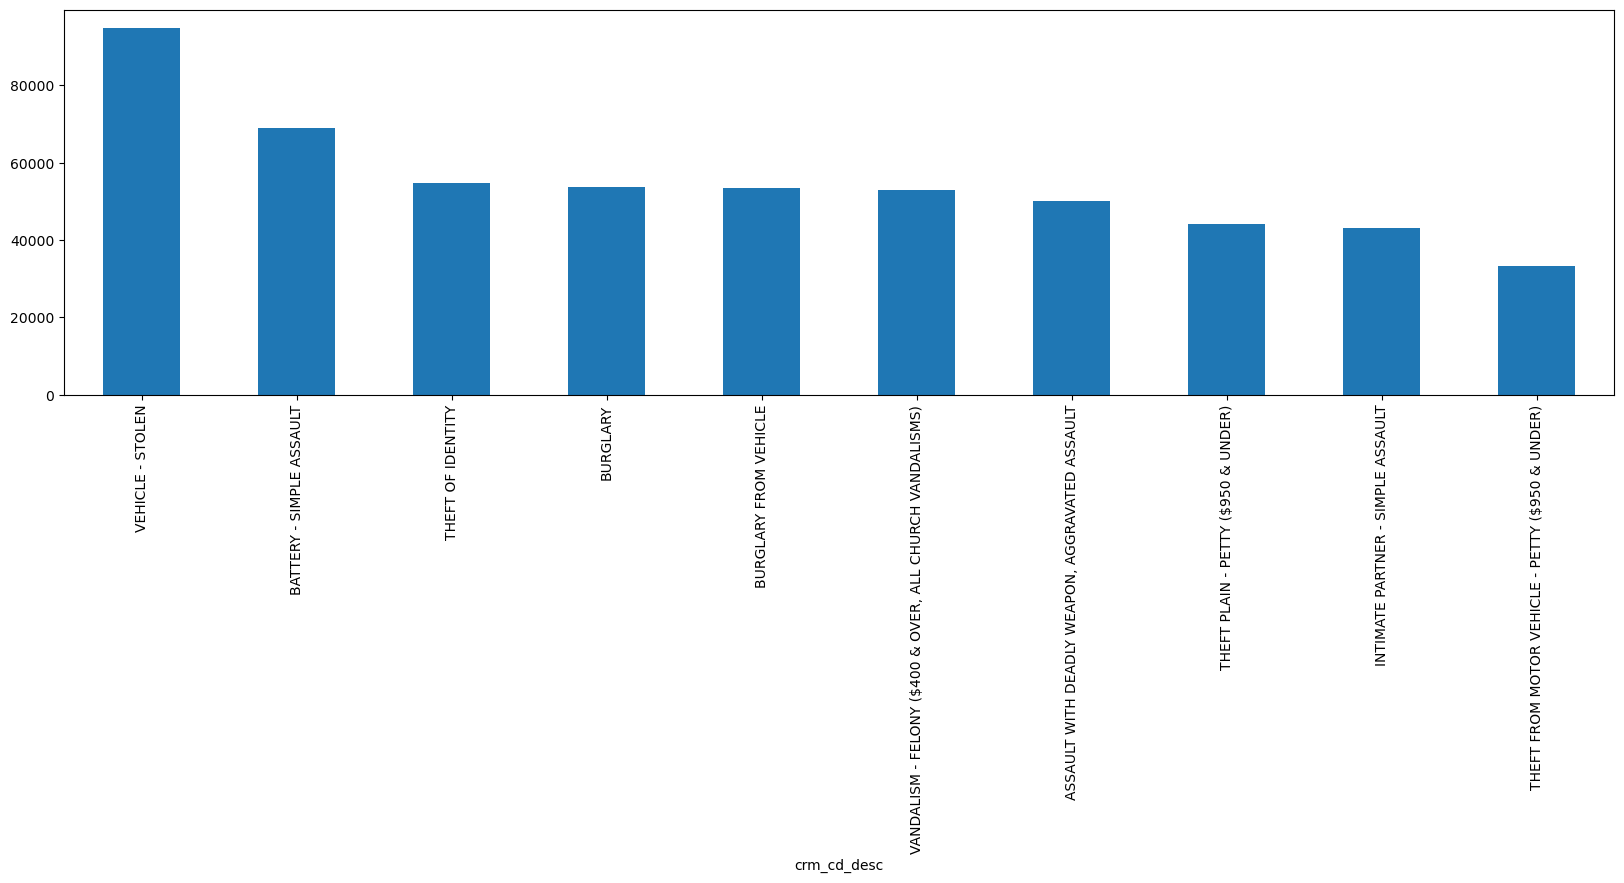

In [281]:
#top 10 crimes committed
crime_code_df_desc.sort_values(ascending=False).head(10).plot(kind="bar",figsize=(20,5))

<Axes: xlabel='crm_cd_desc'>

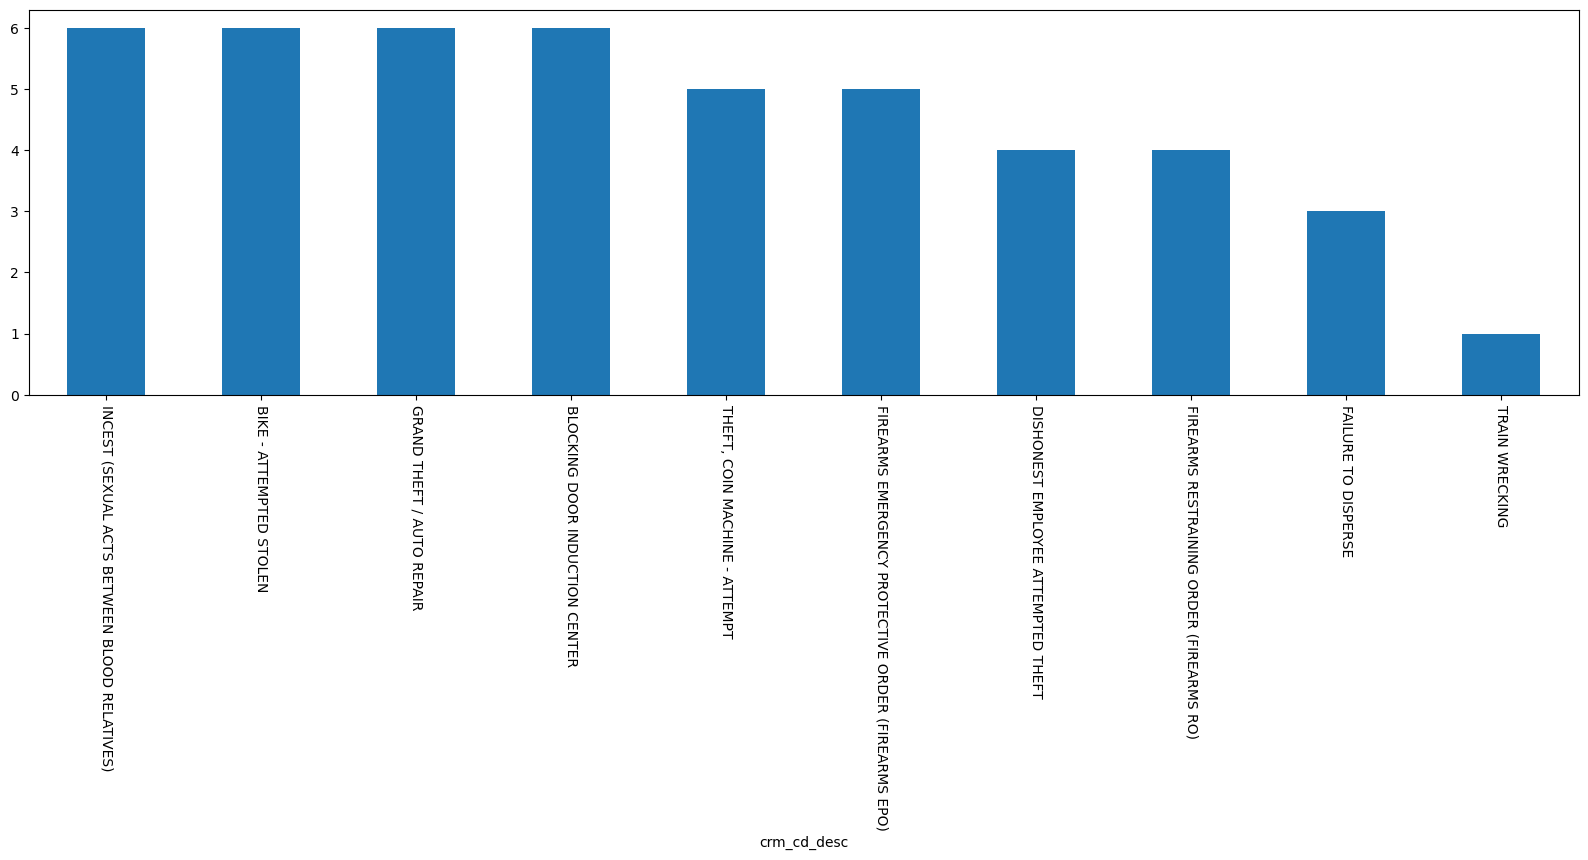

In [282]:
#Least 10 crimes committed
crime_code_df_desc.sort_values(ascending=False).tail(10).plot(kind="bar",figsize=(20,5),rot=-90)

<Axes: xlabel='area_name'>

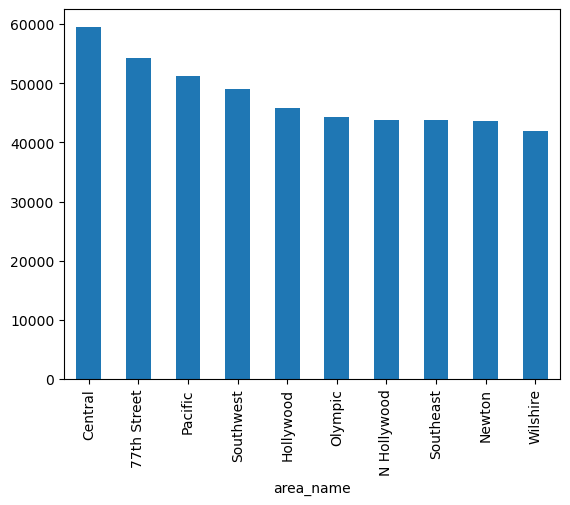

In [283]:
# crime_code_df_area.plot(kind="bar",y="crm_cd_1")
crime_code_df_area["crm_cd_desc"].sort_values(ascending=False).head(10).plot(kind="bar")

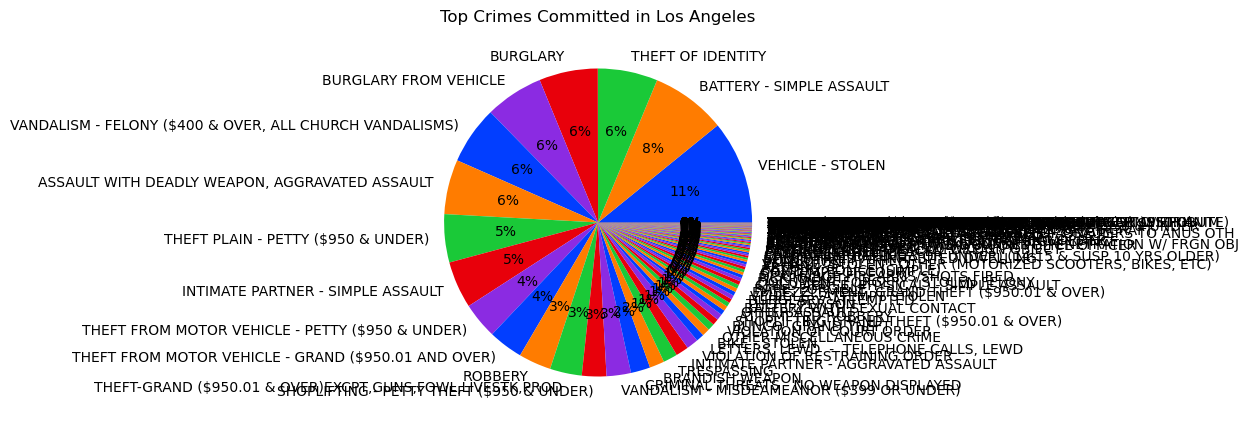

In [284]:
# Top 7 Crimes Committed in Los Angeles

threshold=.06*response_df_formatted.count()
Top_Crimes_LosAngeles=response_df_formatted["crm_cd_desc"].value_counts().sort_values(ascending=False)
# TOP 7 Crimes Committed represent 50% of all the total crimes committed in los angeles in the given period

#define data
plt.figure(figsize=(10,5))
data=Top_Crimes_LosAngeles.values
labels=Top_Crimes_LosAngeles.index


#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:5]


# plt.pie(x=Top_Crimes_LosAngeles.values,labels=Top_Crimes_LosAngeles.index,autopct='%.0f%%')
plt.pie(x=data,labels=labels,colors=colors,autopct='%.0f%%')
plt.title("Top Crimes Committed in Los Angeles")
plt.savefig('Graphs/Top Crimes Committed in Los Angeles')


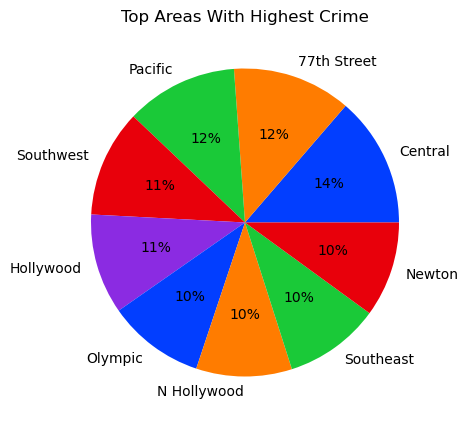

In [285]:
Top_Area_LosAngeles=response_df_formatted["area_name"].value_counts().sort_values(ascending=False).head(9)
# Top 9 cities represnet 50% of all the total crimes committed in LosAngeles

#define data
plt.figure(figsize=(10,5))
data=Top_Area_LosAngeles.values
labels=Top_Area_LosAngeles.index


#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:5]


# plt.pie(x=Top_Crimes_LosAngeles.values,labels=Top_Crimes_LosAngeles.index,autopct='%.0f%%')
plt.pie(x=data,labels=labels,colors=colors,autopct='%.0f%%')
plt.title("Top Areas With Highest Crime")
plt.savefig('Graphs/Top Areas With Highest Crime')

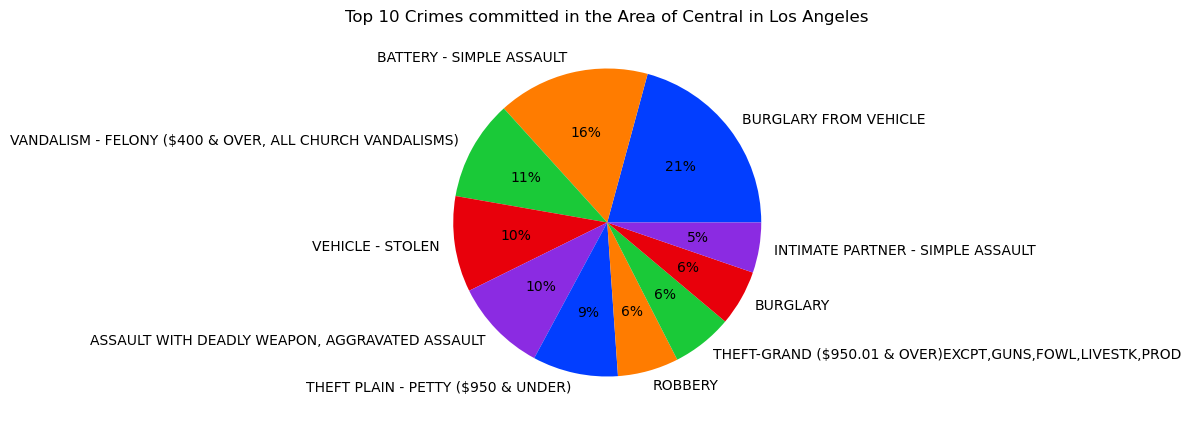

In [286]:
All_Crimes_Comitted_in_Central=response_df_formatted[response_df_formatted["area_name"]=="Central"]["crm_cd_desc"]
# Count is 62658
All_Crimes_Comitted_in_Central_top_10=All_Crimes_Comitted_in_Central.value_counts().sort_values(ascending=False).head(10)


#define data
plt.figure(figsize=(10,5))
data=All_Crimes_Comitted_in_Central_top_10.values
labels=All_Crimes_Comitted_in_Central_top_10.index

# #define Seaborn color palette to use
colors = sns.color_palette('bright')[0:5]


plt.pie(x=data,labels=labels,colors=colors,autopct='%.0f%%')
plt.title("Top 10 Crimes committed in the Area of Central in Los Angeles")
plt.savefig('Graphs/Top 10 Crimes committed in the Area of Central in Los Angeles')

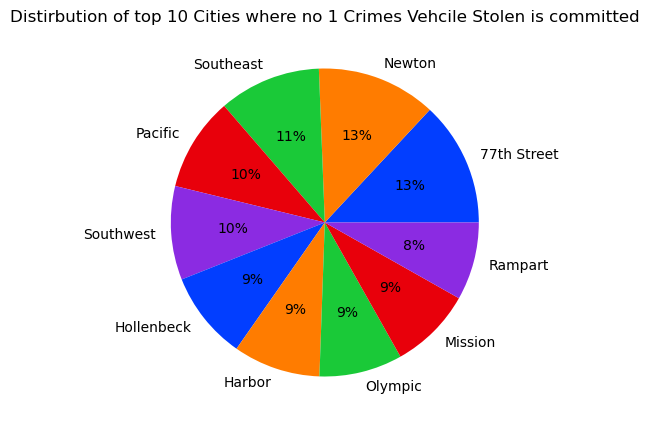

In [287]:
All_Cities_Where_Vehicle_Stolen=response_df_formatted[response_df_formatted["crm_cd_desc"]=="VEHICLE - STOLEN"]["area_name"]
# Count is 62658
Top_Cities_Where_Vehicle_Stolen=All_Cities_Where_Vehicle_Stolen.value_counts().sort_values(ascending=False).head(10)


#define data
plt.figure(figsize=(10,5))
data=Top_Cities_Where_Vehicle_Stolen.values
labels=Top_Cities_Where_Vehicle_Stolen.index

# # #define Seaborn color palette to use
colors = sns.color_palette('bright')[0:5]


plt.pie(x=data,labels=labels,colors=colors,autopct='%.0f%%')
plt.title("Distirbution of top 10 Cities where no 1 Crimes Vehcile Stolen is committed")
plt.savefig('Graphs/Distirbution of top 10 Cities where no 1 Crimes Vehcile Stolen is committed')

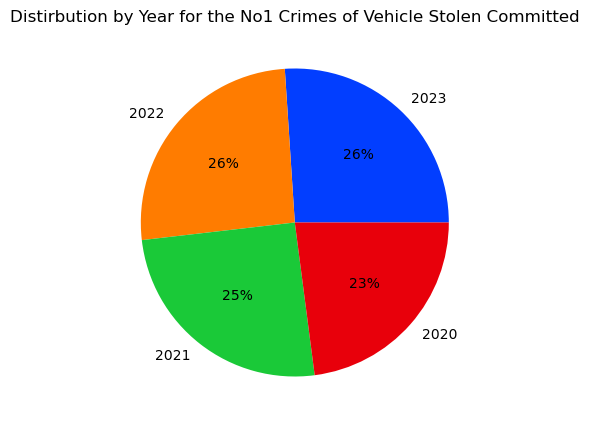

In [288]:
# Ditribution by Year of Top1 Crime Committed
Distribtion_Year_of_Vehicle_Stolen=response_df_formatted[response_df_formatted["crm_cd_desc"]=="VEHICLE - STOLEN"]["Year"]
Year_Vehicles_Stoles=Distribtion_Year_of_Vehicle_Stolen.value_counts().sort_values(ascending=False)



#define data
plt.figure(figsize=(10,5))
data=Year_Vehicles_Stoles.values
labels=Year_Vehicles_Stoles.index

# # #define Seaborn color palette to use
colors = sns.color_palette('bright')[0:5]


plt.pie(x=data,labels=labels,colors=colors,autopct='%.0f%%')
plt.title("Distirbution by Year for the No1 Crimes of Vehicle Stolen Committed")
plt.savefig('Graphs/Distirbution by Year for the No1 Crimes of Vehicle Stolen Committed')

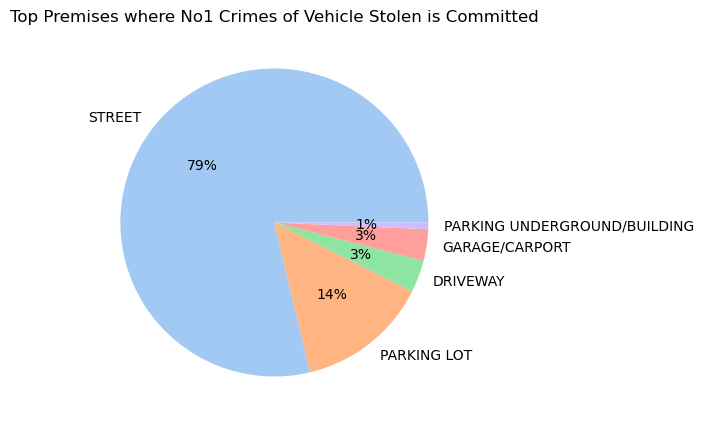

In [289]:
Premise_of_Vehicle_Stolen=response_df_formatted[response_df_formatted["crm_cd_desc"]=="VEHICLE - STOLEN"]["premis_desc"]
Top10_Premise_Vehicles_Stoles=Premise_of_Vehicle_Stolen.value_counts().sort_values(ascending=False).head(5)



#define data
plt.figure(figsize=(10,5))
data=Top10_Premise_Vehicles_Stoles.values
labels=Top10_Premise_Vehicles_Stoles.index

# # #define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]


plt.pie(x=data,labels=labels,colors=colors,autopct='%.0f%%')
plt.title("Top Premises where No1 Crimes of Vehicle Stolen is Committed")
plt.savefig('Graphs/Top Premises where No1 Crimes of Vehicle Stolen is Committed')

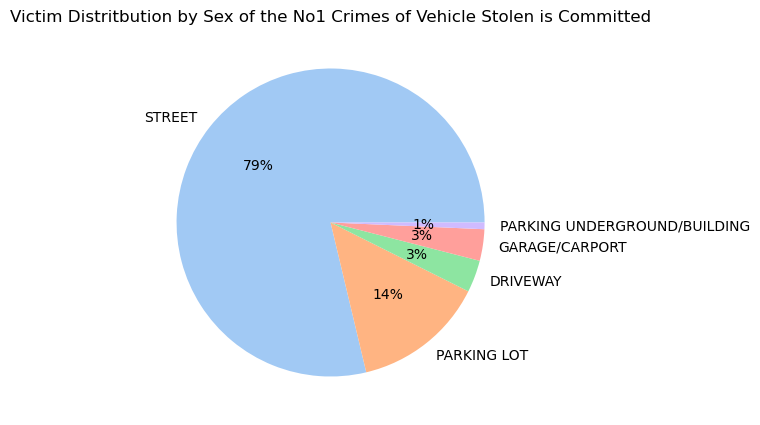

In [290]:
# Ditribution by Year of Top1 Crime Committed
Victim_Sex_OF_Vehicle_Stolen=response_df_formatted[response_df_formatted["crm_cd_desc"]=="VEHICLE - STOLEN"]["vict_sex"]
Distribution_by_Sex_of_All_Victims_Vehcile_Stolen=Premise_of_Vehicle_Stolen.value_counts().sort_values(ascending=False).head(5)



#define data
plt.figure(figsize=(10,5))
data=Distribution_by_Sex_of_All_Victims_Vehcile_Stolen.values
labels=Distribution_by_Sex_of_All_Victims_Vehcile_Stolen.index

# # #define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]


plt.pie(x=data,labels=labels,colors=colors,autopct='%.0f%%')
plt.title("Victim Distritbution by Sex of the No1 Crimes of Vehicle Stolen is Committed")
plt.savefig('Graphs/Victim Distribution by Sex of the No1 Crimes of Vehicle Stolen is Committed')

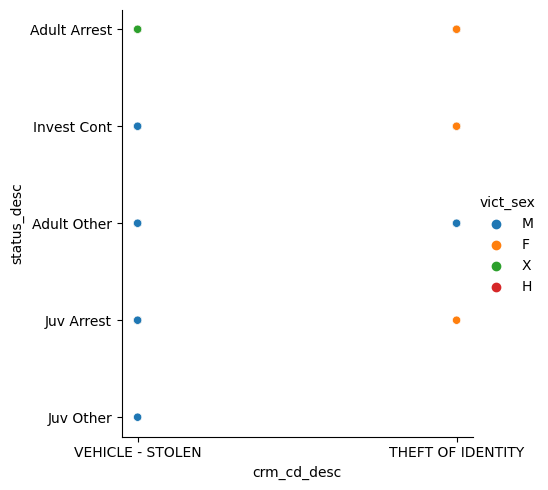

In [291]:

Top_3_Crimes=response_df_formatted[response_df_formatted["crm_cd_desc"].isin(["VEHICLE - STOLEN","BATTERY - SIMPLE ASSAULT ","THEFT OF IDENTITY"])]
# response_df_formatted[response_df_formatted["crm_cd_desc"]=="VEHICLE - STOLEN"]["Year"]

sns.relplot(data=Top_3_Crimes, x="crm_cd_desc", y="status_desc", hue="vict_sex")



Laura's analysis starts here - does not include data formatting and cleaning (needed to put that at start of script)

In [292]:
#(LR)# Group the total crimes by quarter
#Source: https://scales.arabpsychology.com/stats/how-to-group-by-quarter-in-pandas-dataframe-with-example/
total_crime_quarter = response_df_formatted.groupby(response_df_formatted["date_occ"].dt.to_period("Q"))["crm_cd"].count()
total_crime_quarter

date_occ
2020Q1    16152
2020Q2    49667
2020Q3    49438
2020Q4    47816
2021Q1    48004
2021Q2    49838
2021Q3    54938
2021Q4    55428
2022Q1    55955
2022Q2    60504
2022Q3    59411
2022Q4    59040
2023Q1    57501
2023Q2    56406
2023Q3    59118
2023Q4    58330
2024Q1    35796
Freq: Q-DEC, Name: crm_cd, dtype: int64

In [293]:
#(LR)# Group the total crimes by calendar year
#Source: https://scales.arabpsychology.com/stats/how-to-group-by-quarter-in-pandas-dataframe-with-example/
total_crimes = combodata_LR.groupby(["Year"])["crm_cd"].count()
total_crimes

Year
Q1    194866
Q2    212653
Q3    237014
Q4    228809
Name: crm_cd, dtype: int64

# To Group the data by quarters (Calendar Year)

In [294]:
#(LR)# group by total crimes / Q1 calendar year
response_df_q1 = response_df_formatted.loc[response_df_formatted["quarter"] == 1]
response_df_q1.groupby(["Cal_Year"])["dr_no"].count()

Cal_Year
2020    16152
2021    48004
2022    55955
2023    57501
2024    35796
Name: dr_no, dtype: int64

In [295]:
#(LR)# group by total crimes / Q2 calendar year
response_df_q2 = response_df_formatted.loc[response_df_formatted["quarter"] == 2]
response_df_q2.groupby(["Cal_Year"])["dr_no"].count()

Cal_Year
2020    49667
2021    49838
2022    60504
2023    56406
Name: dr_no, dtype: int64

In [296]:
#(LR)# group by total crimes / Q3 calendar year
response_df_q3 = response_df_formatted.loc[response_df_formatted["quarter"] == 3]
response_df_q3.groupby(["Cal_Year"])["dr_no"].count()

Cal_Year
2020    49438
2021    54938
2022    59411
2023    59118
Name: dr_no, dtype: int64

In [297]:
#(LR)# group by total crimes / Q4 calendar year
response_df_q4 = response_df_formatted.loc[response_df_formatted["quarter"] == 4]
response_df_q4.groupby(["Cal_Year"])["dr_no"].count()

Cal_Year
2020    47816
2021    55428
2022    59040
2023    58330
Name: dr_no, dtype: int64

In [298]:
# Configure the map plot, adding the year of the crime by location
map_plot_0 = response_df_formatted.hvplot.points(
    "lon",
    "lat",
    geo = True,
    tiles = "OSM",
    frame_width = 800,
    frame_height = 600,
    color="Year",
    title = "Crime by Coordinates",
    alpha = 0.5
)

plt.savefig('Graphs/Crime Initial Geomap Data')

<Figure size 640x480 with 0 Axes>

In [299]:
#(LR)# To identify the top 10 crime codes
total_crm_cd = combodata_LR["crm_cd"].value_counts()
total_crm_cd_percentage = total_crm_cd/response_df_formatted["dr_no"].count()*100
rounded_total_crm = round(total_crm_cd_percentage,2)
rounded_total_crm.head(10)

crm_cd
510    10.86
624     7.89
354     6.28
310     6.16
330     6.12
740     6.08
230     5.74
440     5.05
626     4.94
420     3.80
Name: count, dtype: float64

In [300]:
#(LR)# To identify the top 10 crimes description
total_crm_desc = combodata_LR["crm_cd_desc"].value_counts()
# total_crm_desc in %
total_crm_desc_percentage = total_crm_desc/response_df_formatted["dr_no"].count()*100
rounded_total_crm = round(total_crm_desc_percentage,2)
total_crm_desc


crm_cd_desc
VEHICLE - STOLEN                                      94862
BATTERY - SIMPLE ASSAULT                              68876
THEFT OF IDENTITY                                     54875
BURGLARY                                              53831
BURGLARY FROM VEHICLE                                 53427
                                                      ...  
FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)        5
DISHONEST EMPLOYEE ATTEMPTED THEFT                        4
FIREARMS RESTRAINING ORDER (FIREARMS RO)                  4
FAILURE TO DISPERSE                                       3
TRAIN WRECKING                                            1
Name: count, Length: 139, dtype: int64

In [301]:
#(LR) To identify threshold
threshold = 50000
other_count = total_crm_desc[total_crm_desc < threshold].sum()
total_crm_desc = total_crm_desc[total_crm_desc >= threshold]
total_crm_desc_series = pd.Series(other_count, index=['others'])
total_crm_desc = pd.concat([total_crm_desc, total_crm_desc_series])
total_crm_desc

VEHICLE - STOLEN                                            94862
BATTERY - SIMPLE ASSAULT                                    68876
THEFT OF IDENTITY                                           54875
BURGLARY                                                    53831
BURGLARY FROM VEHICLE                                       53427
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     53080
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              50137
others                                                     444254
dtype: int64

Text(0, 0.5, '')

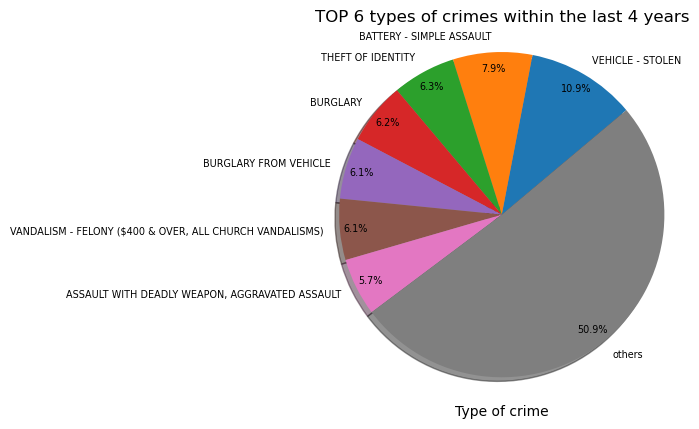

In [302]:
#(LR)# Create a pie chart based off of the group series from before (using others)
#Source: Chart format https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html
explode = [0, 0, 0, 0.1, 0]
pie_chart_1 = total_crm_desc.plot(kind="pie", y="premis_desc", title="TOP 6 types of crimes within the last 4 years", 
                                     autopct="%1.1f%%", shadow=True, textprops={'size': 'x-small'}, startangle=40, pctdistance=0.9, labeldistance=1.1, radius=1.1)

# Set the xlabel and ylabel
pie_chart_1.set_xlabel("Type of crime")
pie_chart_1.set_ylabel("")

In [303]:
#(LR)# Create dataframe for assaults only
# source: https://stackoverflow.com/questions/34682828/extracting-specific-selected-columns-to-ndifferenw-dataframe-as-a-copy
assaults_df = combodata_LR.filter(["dr_no","date_occ","area_name", "crm_cd", "crm_cd_desc", "premis_desc","weapon_used_cd", "quarter", "Year", "yr_qr"])
assaults_df = assaults_df.loc[assaults_df["crm_cd"] == "624"]
assaults_df

,dr_no,date_occ,area_name,crm_cd,crm_cd_desc,premis_desc,weapon_used_cd,Year
9,211904005,2020-12-31,Mission,624,BATTERY - SIMPLE ASSAULT,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",400,Q1
29,220808837,2020-03-30,West LA,624,BATTERY - SIMPLE ASSAULT,SINGLE FAMILY DWELLING,400,Q1
198,211206198,2020-12-20,77th Street,624,BATTERY - SIMPLE ASSAULT,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",400,Q1
208,221715311,2020-07-11,Devonshire,624,BATTERY - SIMPLE ASSAULT,SINGLE FAMILY DWELLING,400,Q1
249,231107419,2020-08-08,Northeast,624,BATTERY - SIMPLE ASSAULT,"VEHICLE, PASSENGER/TRUCK",400,Q1
...,...,...,...,...,...,...,...,...
932041,241205295,2024-01-22,77th Street,624,BATTERY - SIMPLE ASSAULT,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",400,Q4
932043,241205279,2024-01-21,77th Street,624,BATTERY - SIMPLE ASSAULT,STREET,400,Q4
932050,240704113,2024-01-03,Wilshire,624,BATTERY - SIMPLE ASSAULT,PARKING LOT,400,Q4
932076,241406782,2024-02-29,Pacific,624,BATTERY - SIMPLE ASSAULT,SIDEWALK,400,Q4


In [304]:
#(LR)# Create dataframe for theft of identity only
# source: https://stackoverflow.com/questions/34682828/extracting-specific-selected-columns-to-ndifferenw-dataframe-as-a-copy
personal_theft_df = combodata_LR.filter(["dr_no","date_occ","area_name", "crm_cd", "crm_cd_desc", "premis_desc","weapon_used_cd", "quarter", "Year", "yr_qr"])
personal_theft_df = personal_theft_df.loc[personal_theft_df["crm_cd"] == "354"]
personal_theft_df

,dr_no,date_occ,area_name,crm_cd,crm_cd_desc,premis_desc,weapon_used_cd,Year
4,220614831,2020-08-17,Hollywood,354,THEFT OF IDENTITY,SIDEWALK,NaN,Q1
5,231808869,2020-12-01,Southeast,354,THEFT OF IDENTITY,SINGLE FAMILY DWELLING,NaN,Q1
6,230110144,2020-07-03,Central,354,THEFT OF IDENTITY,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,Q1
7,220314085,2020-05-12,Southwest,354,THEFT OF IDENTITY,CELL PHONE STORE,NaN,Q1
8,231309864,2020-12-09,Newton,354,THEFT OF IDENTITY,CYBERSPACE,NaN,Q1
...,...,...,...,...,...,...,...,...
931879,240906066,2024-02-20,Van Nuys,354,THEFT OF IDENTITY,SINGLE FAMILY DWELLING,NaN,Q4
931893,242005741,2024-02-04,Olympic,354,THEFT OF IDENTITY,SINGLE FAMILY DWELLING,NaN,Q4
931921,241210015,2024-02-27,77th Street,354,THEFT OF IDENTITY,SINGLE FAMILY DWELLING,NaN,Q4
932045,241005453,2024-02-05,West Valley,354,THEFT OF IDENTITY,SINGLE FAMILY DWELLING,NaN,Q4


In [305]:
#(LR)# Create dataframe for aggravated assault (single family dwelling excl)
agg_assault_df = combodata_LR.filter(["dr_no","date_occ","area_name", "crm_cd", "crm_cd_desc", "premis_desc","weapon_used_cd", "quarter", "Year", "yr_qr"])
agg_assault_df = agg_assault_df.loc[(agg_assault_df["crm_cd"] == "230") & (agg_assault_df["premis_desc"] != "SINGLE FAMILY DWELLING")]
agg_assault_df


,dr_no,date_occ,area_name,crm_cd,crm_cd_desc,premis_desc,weapon_used_cd,Year
18,210705560,2020-11-27,Wilshire,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",STREET,307,Q1
221,220507155,2020-12-01,Harbor,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",ALLEY,106,Q1
230,220606971,2020-07-02,Hollywood,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",SIDEWALK,400,Q1
932,230221295,2020-11-18,Rampart,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",OTHER BUSINESS,512,Q1
1353,211204028,2020-12-31,77th Street,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",STREET,106,Q1
...,...,...,...,...,...,...,...,...
932034,241805817,2024-02-07,Southeast,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",STREET,212,Q4
932055,240400628,2024-02-16,Hollenbeck,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",STREET,102,Q4
932081,240404535,2024-01-18,Hollenbeck,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",STREET,500,Q4
932082,241104022,2024-01-01,Northeast,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",BAR/COCKTAIL/NIGHTCLUB,400,Q4


In [306]:
#(LR)# Get total numbero of assaults per year
total_assault_year = assaults_df.groupby(["Year"])["crm_cd"].count()
total_assault_year

Year
Q1    15461
Q2    16477
Q3    18024
Q4    18914
Name: crm_cd, dtype: int64

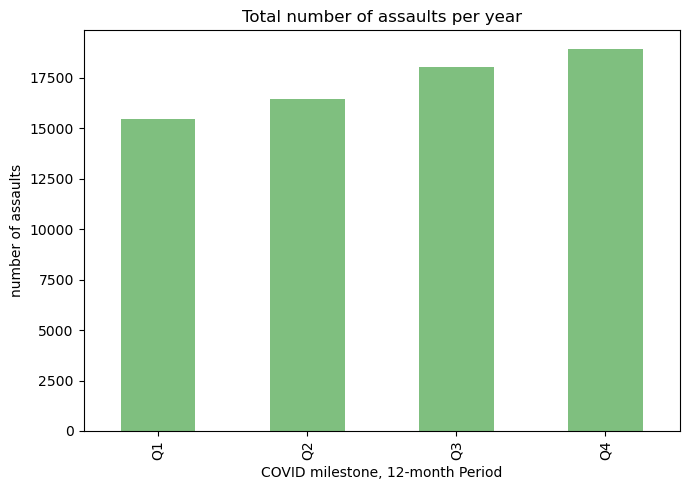

In [307]:
#(LR)# Create a bar chart based off of the total assaults per year
bar_chart_total_assaults = total_assault_year.plot(kind='bar', figsize=(7,5), color="green", alpha=0.5)

# Set the xlabel and ylabel using class methods
bar_chart_total_assaults.set_xlabel("COVID milestone, 12-month Period")
bar_chart_total_assaults.set_ylabel("number of assaults")
bar_chart_total_assaults.set_title("Total number of assaults per year")

plt.tight_layout()

In [308]:
#(LR) # Count the total number of premise descrpition for Assault, identify the most highest values and define a threshold to combine the rest in "others" category.
premis_count = assaults_df["premis_desc"].value_counts()
premis_count

premis_desc
SINGLE FAMILY DWELLING                          11631
STREET                                          10933
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)    10485
SIDEWALK                                         7860
PARKING LOT                                      4187
                                                ...  
OTHER PLACE OF WORSHIP                              1
OIL REFINERY                                        1
MTA - SILVER LINE - LAC/USC MEDICAL CENTER          1
MTA - ORANGE LINE - PIERCE COLLEGE                  1
PEDESTRIAN OVERCROSSING                             1
Name: count, Length: 271, dtype: int64

In [309]:
#(LR) # To create a threshold of 800 for "others" 
threshold = 800
other_count = premis_count[premis_count < threshold].sum()
premis_count = premis_count[premis_count >= threshold]
premis_count_series = pd.Series(other_count, index=['other'])
premis_count = pd.concat([premis_count, premis_count_series])
premis_count

SINGLE FAMILY DWELLING                          11631
STREET                                          10933
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)    10485
SIDEWALK                                         7860
PARKING LOT                                      4187
OTHER BUSINESS                                   3736
RESTAURANT/FAST FOOD                             1366
MTA BUS                                           921
DRIVEWAY                                          868
other                                           16872
dtype: int64

Text(0, 0.5, '')

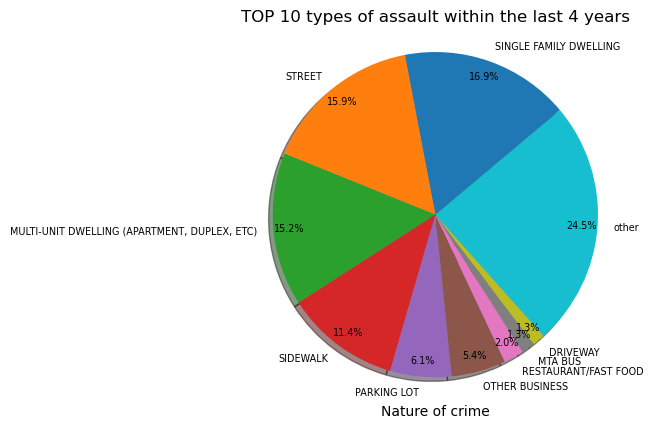

In [310]:
#(LR)# Create a pie chart based off of the group series from before (using others)
#Source: Chart format https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html
explode = [0, 0, 0, 0.1, 0]
pie_chart_1 = premis_count.plot(kind="pie", y="premis_desc", title="TOP 10 types of assault within the last 4 years", 
                                     autopct="%1.1f%%", shadow=True, textprops={'size': 'x-small'}, startangle=40, pctdistance=0.9, labeldistance=1.1, radius=1.1)

# Set the xlabel and ylabel
pie_chart_1.set_xlabel("Nature of crime")
pie_chart_1.set_ylabel("")

In [311]:
#(LR)# To see the trend on single family dwelling violence within the years
single_fam_dwell = assaults_df.loc[assaults_df["premis_desc"] == "SINGLE FAMILY DWELLING"]
single_fam_df = single_fam_dwell.groupby(["Year"])["premis_desc"].count()


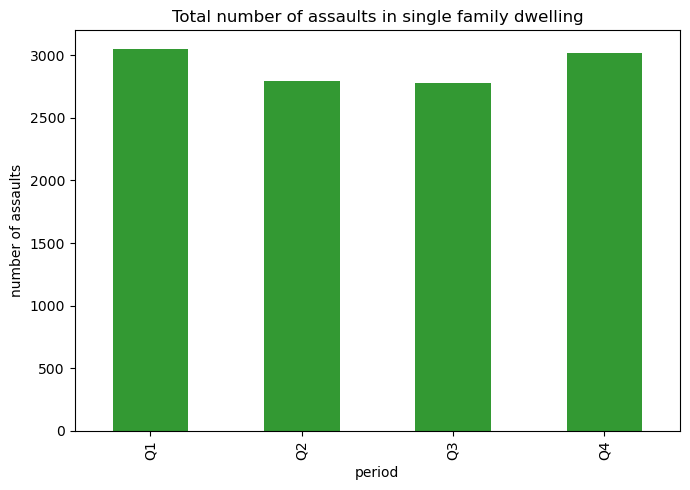

In [312]:
#(LR)# Create a bar chart based off of the total assaults by single family dwelling per period
bar_chart_total_single_fam_df = single_fam_df.plot(kind='bar', figsize=(7,5), color="green", alpha=0.8)
          
# Set the xlabel and ylabel using class methods
bar_chart_total_single_fam_df.set_xlabel("period")
bar_chart_total_single_fam_df.set_ylabel("number of assaults")
bar_chart_total_single_fam_df.set_title("Total number of assaults in single family dwelling")

plt.tight_layout()

In [313]:
#(LR)# To see the trend on street violence within the years
street_violence = assaults_df.loc[assaults_df["premis_desc"] == "STREET"]
street_violence = street_violence.groupby(["Year"])["premis_desc"].count()
street_violence


Year
Q1    2299
Q2    2600
Q3    2860
Q4    3174
Name: premis_desc, dtype: int64

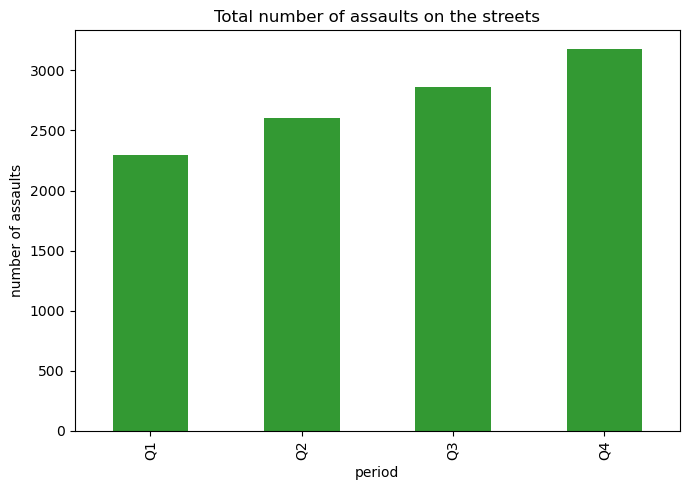

In [314]:
#(LR)# Create a bar chart based off of the total assaults by street violence per period
bar_chart_total_street_violence_df = street_violence.plot(kind='bar', figsize=(7,5), color="green", alpha=0.8)

# Set the xlabel and ylabel using class methods
bar_chart_total_street_violence_df.set_xlabel("period")
bar_chart_total_street_violence_df.set_ylabel("number of assaults")
bar_chart_total_street_violence_df.set_title("Total number of assaults on the streets")


plt.tight_layout()

In [315]:
#(LR)# To see the trend on sidewalk violence within the years
sidewalk_violence = assaults_df.loc[assaults_df["premis_desc"] == "SIDEWALK"]
sidewalk_violence = sidewalk_violence.groupby(["Year"])["premis_desc"].count()
sidewalk_violence

Year
Q1    1791
Q2    1878
Q3    2100
Q4    2091
Name: premis_desc, dtype: int64

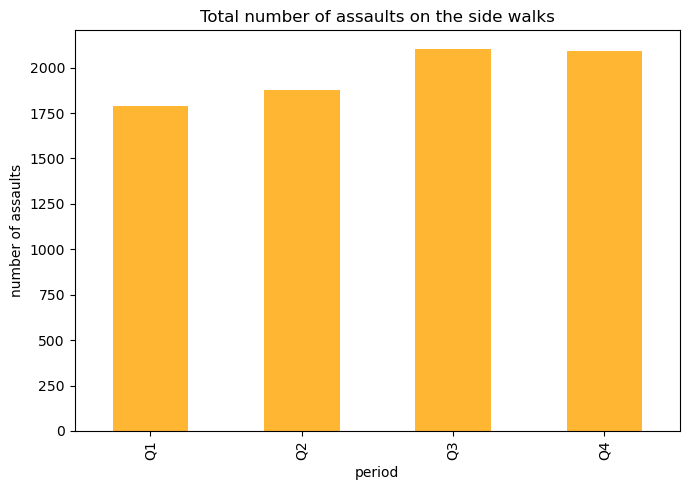

In [316]:
#(LR)# Create a bar chart based off of the total assaults by street violence per period
bar_chart_total_sidewalk_df = sidewalk_violence.plot(kind='bar', figsize=(7,5), color="orange", alpha=0.8)

# Set the xlabel and ylabel using class methods
bar_chart_total_sidewalk_df.set_xlabel("period")
bar_chart_total_sidewalk_df.set_ylabel("number of assaults")
bar_chart_total_sidewalk_df.set_title("Total number of assaults on the side walks")

plt.tight_layout()

# Violent crime = theft

In [317]:
#(LR)# Get total number of thefts per year
total_theft_year = personal_theft_df.groupby(["Year"])["crm_cd"].count()
total_theft_year

Year
Q1     8754
Q2    12367
Q3    23409
Q4    10345
Name: crm_cd, dtype: int64

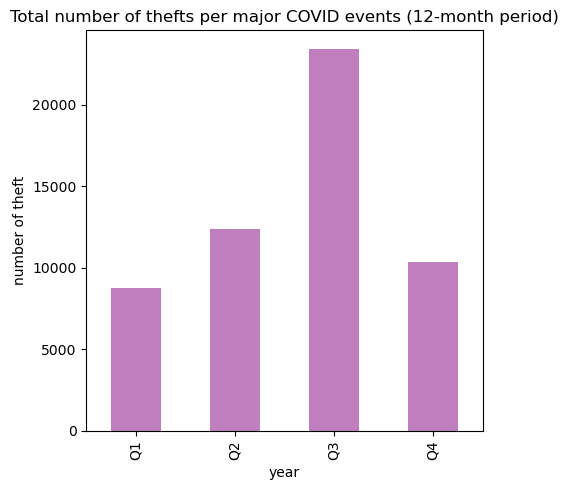

In [318]:
#(LR)# Create a bar chart based off of the total theft per year
bar_chart_total_theft = total_theft_year.plot(kind='bar', figsize=(5,5), color="purple", alpha=0.5)

# Set the xlabel and ylabel using class methods
bar_chart_total_theft.set_xlabel("year")
bar_chart_total_theft.set_ylabel("number of theft")
bar_chart_total_theft.set_title("Total number of thefts per major COVID events (12-month period)")

plt.tight_layout()

In [319]:
#(LR)# Get total number of thefts per year
total_aggrav_assault_year = agg_assault_df.groupby(["Year"])["crm_cd"].count()
total_aggrav_assault_year

Year
Q1    10464
Q2    11630
Q3    11499
Q4    11357
Name: crm_cd, dtype: int64

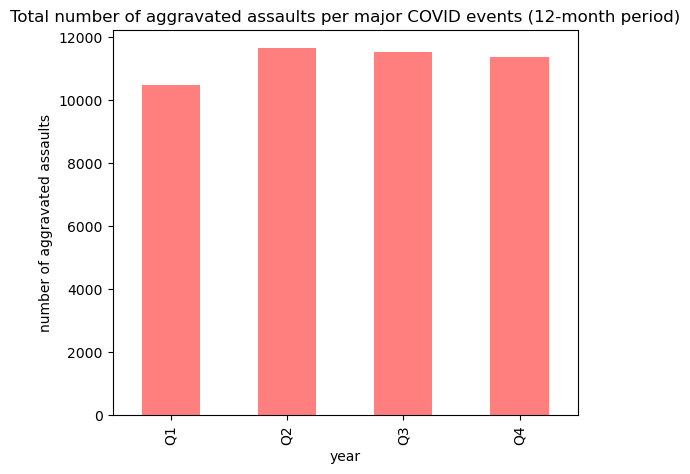

In [320]:
#(LR)# Create a bar chart based off of the total theft per year
bar_chart_total_agg_assault = total_aggrav_assault_year.plot(kind='bar', figsize=(6,5), color="red", alpha=0.5)

# Set the xlabel and ylabel using class methods
bar_chart_total_agg_assault.set_xlabel("year")
bar_chart_total_agg_assault.set_ylabel("number of aggravated assaults")
bar_chart_total_agg_assault.set_title("Total number of aggravated assaults per major COVID events (12-month period)")
plt.show()

In [321]:
#(LR)# Group the total assaults by quarter
assaults_quarter = assaults_df.groupby(assaults_df["date_occ"].dt.to_period("Q"))["crm_cd"].count()
assaults_quarter

date_occ
2020Q1    1346
2020Q2    3858
2020Q3    4298
2020Q4    3733
2021Q1    3415
2021Q2    3886
2021Q3    4576
2021Q4    4084
2022Q1    4178
2022Q2    4666
2022Q3    4761
2022Q4    4453
2023Q1    4215
2023Q2    4788
2023Q3    5039
2023Q4    4787
2024Q1    2793
Freq: Q-DEC, Name: crm_cd, dtype: int64

In [322]:
#(LR)# Group the total Theft by quarter
theft_quarter = personal_theft_df.groupby(personal_theft_df["date_occ"].dt.to_period("Q"))["crm_cd"].count()
theft_quarter

date_occ
2020Q1     713
2020Q2    2053
2020Q3    2095
2020Q4    2225
2021Q1    2616
2021Q2    2644
2021Q3    2798
2021Q4    3184
2022Q1    4594
2022Q2    5953
2022Q3    5246
2022Q4    6207
2023Q1    5479
2023Q2    2805
2023Q3    2636
2023Q4    2261
2024Q1    1366
Freq: Q-DEC, Name: crm_cd, dtype: int64

In [323]:
#(LR)# Group the total robbery by quarter
agg_assaults_quarter = agg_assault_df.groupby(agg_assault_df["date_occ"].dt.to_period("Q"))["crm_cd"].count()
agg_assaults_quarter

date_occ
2020Q1     656
2020Q2    2569
2020Q3    2907
2020Q4    2748
2021Q1    2448
2021Q2    2891
2021Q3    3343
2021Q4    2789
2022Q1    2684
2022Q2    3130
2022Q3    3125
2022Q4    2643
2023Q1    2530
2023Q2    2871
2023Q3    3179
2023Q4    2764
2024Q1    1673
Freq: Q-DEC, Name: crm_cd, dtype: int64

In [324]:
#(LR) # To build a dataframe per total assaults, total personal theft, and total robbery per quarter - INFORMATION ONLY - 
total_violent_crm_quarter = pd.DataFrame({
    "Total Crimes per quarter" : total_crime_quarter,
    "Total assaults per quarter" : assaults_quarter,
    "Total personal theft per quarter": theft_quarter,
    "Total aggravated assaults per quarter": agg_assaults_quarter
})
total_violent_crm_quarter.set_index=(True)
total_violent_crm_quarter


,Total Crimes per quarter,Total assaults per quarter,Total personal theft per quarter,Total aggravated assaults per quarter
date_occ,,,,
2020Q1,16152,1346,713,656
2020Q2,49667,3858,2053,2569
2020Q3,49438,4298,2095,2907
2020Q4,47816,3733,2225,2748
2021Q1,48004,3415,2616,2448
2021Q2,49838,3886,2644,2891
2021Q3,54938,4576,2798,3343
2021Q4,55428,4084,3184,2789
2022Q1,55955,4178,4594,2684


In [325]:
#(LR) # To build a dataframe per total assaults and total personal theft per year
total_violent_crm_year = pd.DataFrame({
    "Total Crimes per year" : total_crimes,
    "Total assaults per year" : total_assault_year,
    "Total personal theft per year": total_theft_year,
    "Total aggravated assaults per year" : total_aggrav_assault_year
})
total_violent_crm_year.set_index=(True)
total_violent_crm_year

,Total Crimes per year,Total assaults per year,Total personal theft per year,Total aggravated assaults per year
Year,,,,
Q1,194866,15461,8754,10464
Q2,212653,16477,12367,11630
Q3,237014,18024,23409,11499
Q4,228809,18914,10345,11357


Text(0.5, 1.0, 'Violent crimes vs total crimes per period')

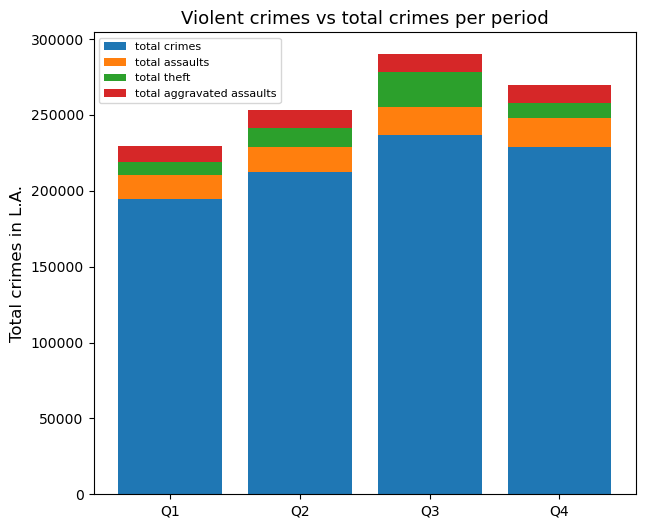

In [326]:
#(LR)# Setting up all our subplots
#Source: https://stackoverflow.com/questions/73660242/how-to-create-loop-to-build-matplotlib-bar-stacked-bar-graphs-using-a-dataframe
fig, ax = plt.subplots(figsize=(7,6))

# Editing each bars
ax.bar(total_violent_crm_year.index, total_violent_crm_year["Total Crimes per year"], label= "total crimes")

ax.bar(total_violent_crm_year.index, total_violent_crm_year["Total assaults per year"], label = "total assaults",
 bottom = total_violent_crm_year["Total Crimes per year"])

ax.bar(total_violent_crm_year.index, total_violent_crm_year["Total personal theft per year"], label = "total theft",
 bottom = total_violent_crm_year["Total assaults per year"] + total_violent_crm_year["Total Crimes per year"])

ax.bar(total_violent_crm_year.index, total_violent_crm_year["Total aggravated assaults per year"], label = "total aggravated assaults", 
bottom = total_violent_crm_year["Total assaults per year"] + total_violent_crm_year["Total Crimes per year"] 
+ total_violent_crm_year["Total personal theft per year"])

# Adding graphs element
ax.legend(fontsize="8")
ax.set_ylabel('Total crimes in L.A.', size=12)
ax.set_title("Violent crimes vs total crimes per period", size=13)


In [327]:
#(LR) # To build a dataframe per total assaults and total personal theft per year
total_crm_vs_asslt_theft = pd.DataFrame({
    "Total Crimes per year" : total_crimes,
    "Total assaults per year" : total_assault_year,
    "Total personal theft per year": total_theft_year
})
total_crm_vs_asslt_theft.set_index=(True)
total_crm_vs_asslt_theft

,Total Crimes per year,Total assaults per year,Total personal theft per year
Year,,,
Q1,194866,15461,8754
Q2,212653,16477,12367
Q3,237014,18024,23409
Q4,228809,18914,10345


In [328]:
#(LR) # To build a dataframe per total assaults
total_crm_vs_asslt = pd.DataFrame({
    "Total Crimes per year" : total_crimes,
    "Total assaults per year" : total_assault_year
 })
total_crm_vs_asslt.set_index=(True)
total_crm_vs_asslt

,Total Crimes per year,Total assaults per year
Year,,
Q1,194866,15461
Q2,212653,16477
Q3,237014,18024
Q4,228809,18914


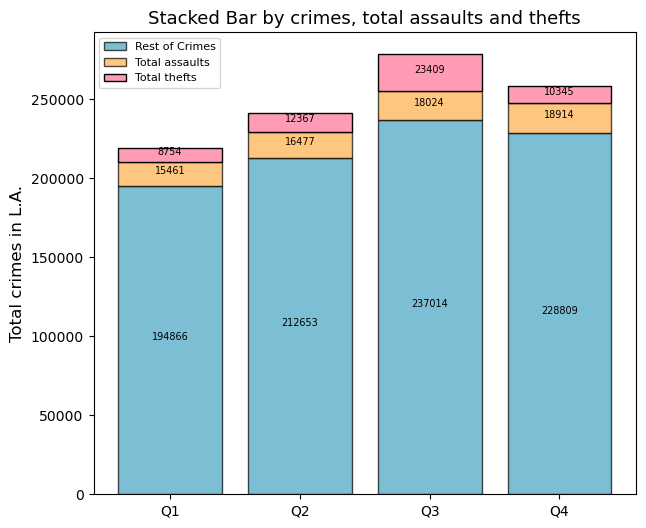

In [329]:
#(LR)# To build a stacked bar per year with total assaults total personal theft  vs total crimes
#https://python-charts.com/part-whole/stacked-bar-chart-matplotlib/
groups = total_crm_vs_asslt_theft.index
values1 = total_crm_vs_asslt_theft["Total Crimes per year"]
values2 = total_crm_vs_asslt_theft["Total assaults per year"]
values3 = total_crm_vs_asslt_theft["Total personal theft per year"]

fig, ax = plt.subplots(figsize=(7,6))
# Stacked bar chart
#Source for colors: https://www.colorhexa.com/ffae49
ax.bar(groups, values1, color = "#44a5c2", alpha=0.7,edgecolor = "black", linewidth = 1, label= "Rest of crimes")
ax.bar(groups, values2, color ="#ffae49", alpha=0.7,edgecolor = "black", linewidth = 1, bottom = values1, label= "Total assaults per year")
ax.bar(groups, values3, color ="#ff9bb5", alpha=1,edgecolor = "black", linewidth = 1, bottom = np.add(values1, values2))

# Labels
for bar in ax.patches:
  ax.text(bar.get_x() + bar.get_width() / 2,
          bar.get_height() / 2 + bar.get_y(),
          round(bar.get_height()), ha = 'center',
            size = 7)
labels_leyend = ["Rest of Crimes", "Total assaults", "Total thefts"]
ax.legend(labels=labels_leyend, fontsize="8")
ax.set_ylabel('Total crimes in L.A.', size=12)
ax.set_title("Stacked Bar by crimes, total assaults and thefts", size=13)
y_offset = 0


plt.show()

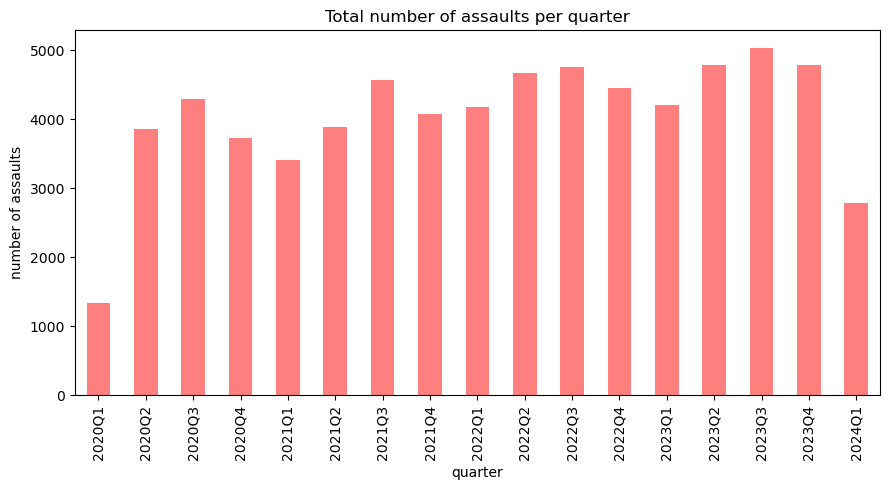

In [330]:
#(LR)# Create a bar chart based off of the group series from before
bar_chart_1 = assaults_quarter.plot(kind='bar', figsize=(9,5), color="red", alpha=0.5)

# Set the xlabel and ylabel using class methods
bar_chart_1.set_xlabel("quarter")
bar_chart_1.set_ylabel("number of assaults")
bar_chart_1.set_title("Total number of assaults per quarter")

plt.tight_layout()